# Problem Statement:
- The Australian real estate market is highly dynamic, with property prices influenced by a combination of geographic, structural, and market-specific factors. Accurately predicting property prices is crucial for stakeholders, including real estate agents, buyers, and investors, to make informed decisions. However, the complexity and variability in factors such as property type, number of rooms, land size, distance from the central business district (CBD), and selling method make price prediction a challenging task.

- Given the availability of a detailed dataset that includes attributes like property features, geographic details, and sales methods, a supervised machine learning model can be developed to predict house prices. Such a model would help in understanding the factors driving property prices and provide reliable price estimates, enabling more data-driven decision-making for stakeholders.

# Objectives:
- To develop a supervised machine learning model capable of accurately predicting house prices based on property-specific, geographic, and market attributes.
- To identify and quantify the most significant factors affecting house prices, such as property type, land size, distance from CBD, and number of rooms.
- To evaluate the model’s performance using appropriate regression metrics (e.g., R², RMSE) and ensure its predictions are robust and interpretable.

# Data 

### Feature description 

- **Rooms:** Number of rooms

- **Price:** Price in dollars

- **Method:** S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

- **Type:** br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

- **SellerG:** Real Estate Agent

- **Date:** Date sold

- **Distance:** Distance from CBD

- **Regionname:** General Region (West, North West, North, North east …etc)

- **Propertycount:** Number of properties that exist in the suburb.

- **Bedroom2:** Scraped # of Bedrooms (from different source)

- **Bathroom:** Number of Bathrooms

- **Car:** Number of carspots

- **Landsize:** Land Size

- **BuildingArea:** Building Size

- **CouncilArea:** Governing council for the area

In [63]:
# Import dependencies 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

# For default view 
pd.set_option("display.max_columns", 75)

In [64]:
# Import data 
df = pd.read_csv("/home/western/Documents/Data/melb_data.csv")
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/12/2016       2.5    3067.0       2.0       1.0  1.0     202.0   
1  4/02/2016       2.5    3067.0       2.0       1.0  0.0     156.0   
2  4/03/2017       2.5    3067.0       3.0       2.0  0.0     134.0   
3  4/03/2017       2.5    3067.0       3.0       2.0  1.0      94.0   
4  4/06/2016       2.5    3067.0       3.0       1.0  2.0     120.0   

   BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN       Yarra   -37.7996    144.9984   
1          79.0     1900.0       Yarra   -37.8079    144.9934   
2         150.0     1900.0       Yarra   -37.8093    144.9944   
3           NaN        NaN       Yarra   -37.7969    144.9969   
4         142.0     2014.0       Yarra   -37.8072    144.9941   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

In [65]:
#df['method'].unique()

In [66]:
# Value count for columns 
cat_columns = df.select_dtypes(include=['object'])

frequency_count = {}
for cols in cat_columns:
    frequency_count[cols] = df[cols].value_counts()
    
# for column, counts in frequency_count.items():
#     print(f"Frequency count for: {cols}:")
#     print(counts)
#     print()

## Initial Data Exploration

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Descriptive statistics 

In [68]:
# Numeric columns 
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [69]:
# Categorical columns 
df.describe(include='O')

Suburb           Address   Type Method SellerG        Date  \
count       13580             13580  13580  13580   13580       13580   
unique        314             13378      3      5     268          58   
top     Reservoir  36 Aberfeldie St      h      S  Nelson  27/05/2017   
freq          359                 3   9449   9022    1565         473   

       CouncilArea             Regionname  
count        12211                  13580  
unique          33                      8  
top       Moreland  Southern Metropolitan  
freq          1163                   4695

In [70]:
print(df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [71]:
# Rename columns 

df = df.rename(columns={'SellerG':'real_estate_agent', 'Bathroom':'no_of_bathroom', 'Bedroom2': 'no_of_bedrooms',
                        'BuildingArea':'building_size', 'YearBuilt': 'year_built', 'Type':'types',
                        'CouncilArea':'council_area', 'Regionname':'region_name',
                        'Propertycount':'property_count', 'Lattitude':'latitude', 'Longtitude':'longitude' })

#change column names to lowercase
df.columns = df.columns.str.lower()

df.columns

Index(['suburb', 'address', 'rooms', 'types', 'price', 'method',
       'real_estate_agent', 'date', 'distance', 'postcode', 'no_of_bedrooms',
       'no_of_bathroom', 'car', 'landsize', 'building_size', 'year_built',
       'council_area', 'latitude', 'longitude', 'region_name',
       'property_count'],
      dtype='object')

# Data Cleaning 

## Duplicates 

In [72]:
df.duplicated(keep=False).sum()

0

- There are no duplicated entries in the dataset

## Missing values 

In [73]:
missing_values = df.isnull().sum()

In [74]:
# Total rows 
total_records = len(df)

# Missing values 
missing_values = df.isnull().sum()

# Percent missing values 
percent_missing_values = (missing_values/ total_records) * 100

# Use a DataFrame 
missing_values_df = pd.DataFrame({
    'missing_values': missing_values,
    'percentage (%)': percent_missing_values
})

print(f"Total records: {total_records}")
# Slice to only the missing values 
missing_values_df.iloc[10:18, :]





Total records: 13580


missing_values  percentage (%)
no_of_bedrooms               0        0.000000
no_of_bathroom               0        0.000000
car                         62        0.456554
landsize                     0        0.000000
building_size             6450       47.496318
year_built                5375       39.580265
council_area              1369       10.081001
latitude                     0        0.000000

In [75]:
df['landsize'] = df['landsize'].replace(0, np.nan)
df['building_size'] = df['building_size'].replace(0, np.nan)

In [76]:
# Total rows 
total_records = len(df)

# Missing values 
missing_values = df.isnull().sum()

# Percent missing values 
percent_missing_values = (missing_values/ total_records) * 100

# Use a DataFrame 
missing_values_df = pd.DataFrame({
    'missing_values': missing_values,
    'percentage (%)': percent_missing_values
})

print(f"Total records: {total_records}")
# Slice to only the missing values 
missing_values_df.iloc[10:18, :]


Total records: 13580


missing_values  percentage (%)
no_of_bedrooms               0        0.000000
no_of_bathroom               0        0.000000
car                         62        0.456554
landsize                  1939       14.278351
building_size             6467       47.621502
year_built                5375       39.580265
council_area              1369       10.081001
latitude                     0        0.000000

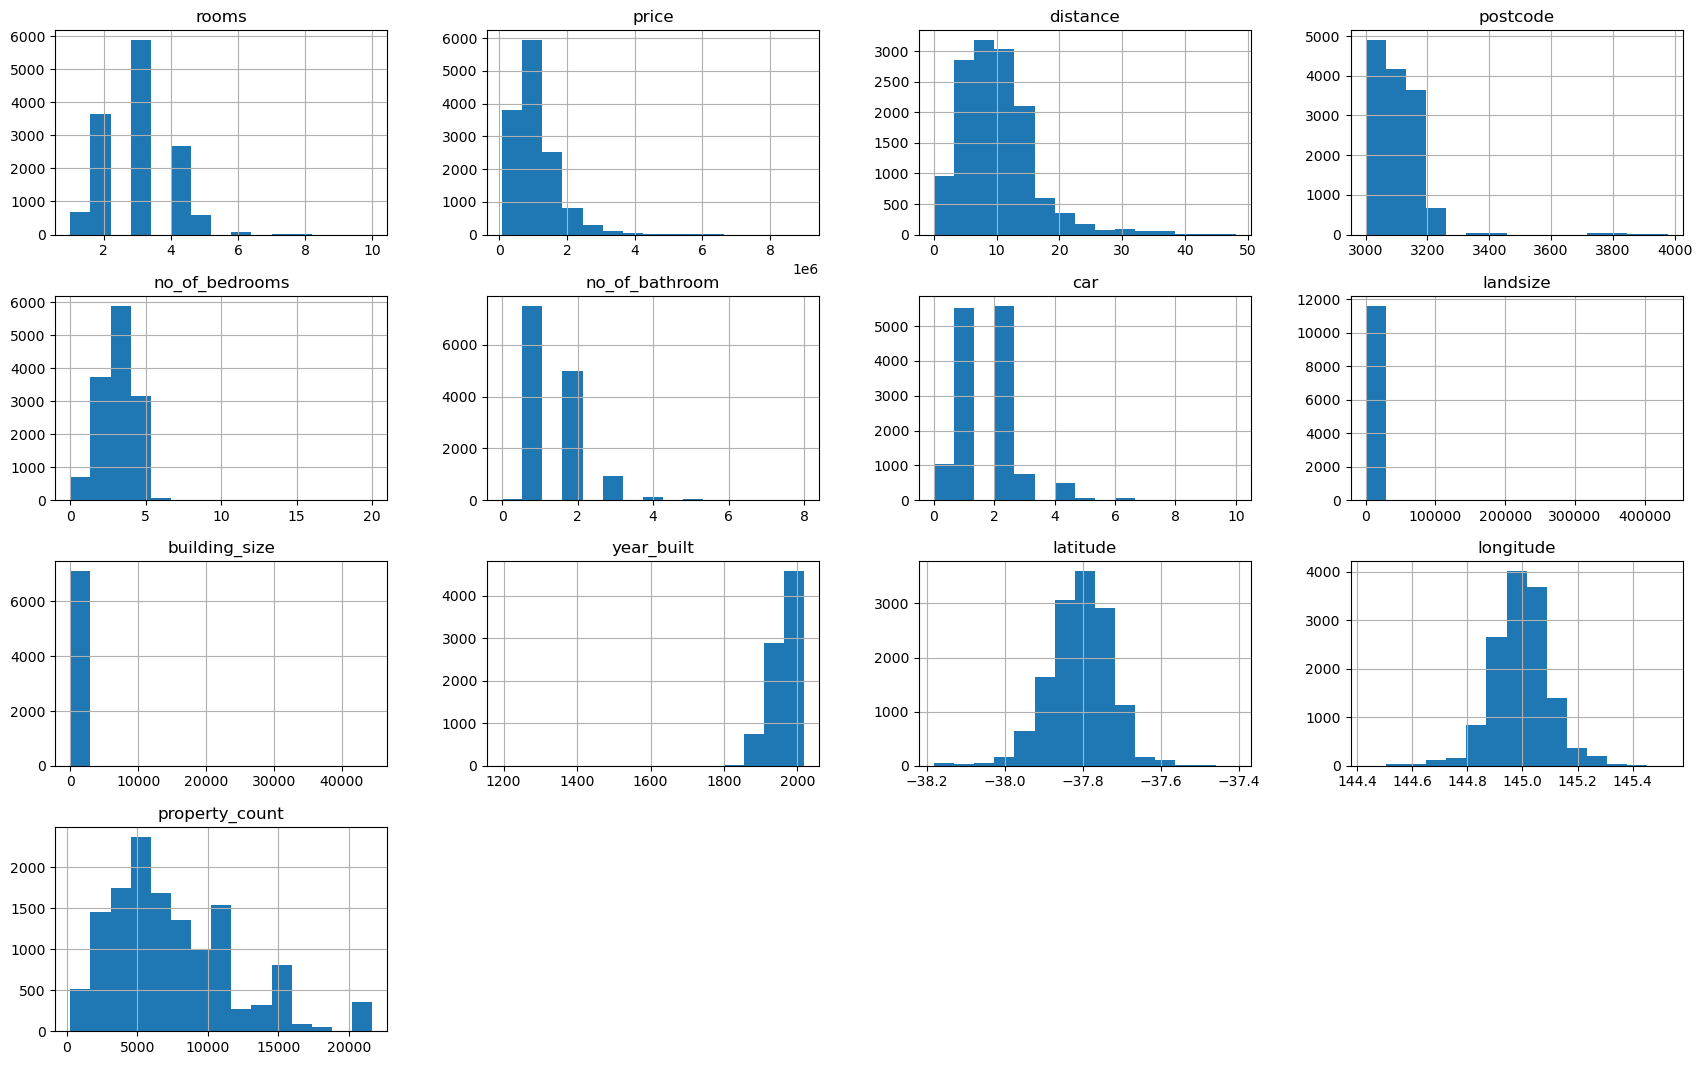

In [77]:
df.hist(bins=15, figsize=(21,13));

### Missing value imputation 

In [78]:
# Impute binary car column with modal value 
df['car'] = df['car'].fillna(df['car']).median()

# Impute council area with mode 
df['council_area']= df['council_area'].fillna(df['council_area'].mode()[0])

# # Impute building size and year built with median 
# df['buildind_size'] = df['building_size'].fillna(df[building_size].median())
# df['year'] = df['year'].fillna(df['year'].median())

# Check for remaining missing values
print(df.isnull().sum())

suburb                  0
address                 0
rooms                   0
types                   0
price                   0
method                  0
real_estate_agent       0
date                    0
distance                0
postcode                0
no_of_bedrooms          0
no_of_bathroom          0
car                     0
landsize             1939
building_size        6467
year_built           5375
council_area            0
latitude                0
longitude               0
region_name             0
property_count          0
dtype: int64


## Imputation 

### KNN imputation 

In [79]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import StandardScaler

# # Select numeric columns from the DataFrame excluding the target column
# target_column = 'price'
# numeric_columns = df.select_dtypes(include='number').columns.drop(target_column)

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Scale the numeric columns
# df_scaled = df.copy()
# df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # Initialize KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Impute missing values using KNN Imputer
# df_scaled[numeric_columns] = knn_imputer.fit_transform(df_scaled[numeric_columns])

# # Inverse transform to get the original scale
# df[numeric_columns] = scaler.inverse_transform(df_scaled[numeric_columns])

# print("KNN Imputation completed successfully.")


### Non-Negative Constraint in the Imputation Model
- A "non-negative constraint" in the context of data imputation means that the imputed values generated by the model are always forced to be greater than or equal to zero, essentially preventing any negative values from being produced in the completed dataset; this is particularly useful when dealing with data where the underlying variable is inherently positive such as Prices, Counts, Distances, Probabilities, Physical quantities (e.g., weight, height, energy)

In [80]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Select numeric columns from the DataFrame excluding the target column
target_column = 'price'
numeric_columns = df.select_dtypes(include='number').columns.drop(target_column)

# Fill missing values temporarily with the mean before scaling (if necessary)
#df_temp = df.copy()
#df_temp[numeric_columns] = df_temp[numeric_columns].fillna(df_temp[numeric_columns].mean())

# Standardize the data
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Use Lasso with adjusted parameters for non-negative constraint
lasso = Lasso(alpha=1.0, positive=True, max_iter=10000)

# Initialize Iterative Imputer with Lasso as the estimator
iterative_imputer = IterativeImputer(estimator=lasso, random_state=42, max_iter=10000, tol=1e-4)

# Impute missing values
df_scaled[numeric_columns] = iterative_imputer.fit_transform(df_scaled[numeric_columns])

# Inverse transform to get the original scale
df[numeric_columns] = scaler.inverse_transform(df_scaled[numeric_columns])

print("Imputation with Lasso completed successfully.")


Imputation with Lasso completed successfully.


/home/western/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00



In [81]:
# import numpy as np
# import pandas as pd
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import StandardScaler, PowerTransformer

# # Assume df is already defined with numerical columns and missing values

# # Select numeric columns from the DataFrame excluding the target column
# target_column = 'price'
# numeric_columns = df.select_dtypes(include='number').columns.drop(target_column)

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Scale the numeric columns
# df_scaled = df.copy()
# df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # Apply Power Transformer on scaled data
# power_trans = PowerTransformer(method='yeo-johnson', standardize=True)
# df_scaled[numeric_columns] = power_trans.fit_transform(df_scaled[numeric_columns])


# # Use Lasso with a non-negative constraint as the estimator for Iterative Imputer
# lasso = Lasso(alpha=1.0, positive=True) # Adjusted alpha
# iterative_imputer = IterativeImputer(estimator=lasso, random_state=42, max_iter=1000000, tol=1e-5) # Adjusted max_iter and tol

# # Impute missing values
# df_scaled[numeric_columns] = iterative_imputer.fit_transform(df_scaled[numeric_columns])

# # Invert Power Transformer
# df_scaled[numeric_columns] = power_trans.inverse_transform(df_scaled[numeric_columns])

# # Inverse transform to get the original scale
# df[numeric_columns] = scaler.inverse_transform(df_scaled[numeric_columns])

# print("Non-negative constraint imputation completed successfully.")

### Interative imputation 

In [82]:
# from sklearn.experimental import enable_iterative_imputer  # enable the IterativeImputer
# from sklearn.impute import IterativeImputer
# from sklearn.preprocessing import StandardScaler


# # Select numeric columns from the DataFrame excluding the target column
# target_column = 'price'
# numeric_columns = df.select_dtypes(include='number').columns.drop(target_column)

# # Check for missing values in numeric columns
# if df[numeric_columns].isnull().any().any():
#     print("Missing values detected in numeric columns.")

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Scale the numeric columns (consider handling missing values first)
# df_scaled = df.copy()
# df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# # Initialize Iterative Imputer with additional parameters
# iterative_imputer = IterativeImputer(random_state=42, max_iter=20, tol=1e-4, verbose=0)
# #iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42, max_iter=20, tol=1e-4, verbose=2)

# # Impute missing values using Iterative Imputer (MICE)
# df_scaled[numeric_columns] = iterative_imputer.fit_transform(df_scaled[numeric_columns])

# # Inverse transform to get the original scale
# df[numeric_columns] = scaler.inverse_transform(df_scaled[numeric_columns])

# print("Imputation completed successfully.")


### Random sampling 

In [83]:
# # # Function for random sampling, include random_state for reproducibility  

# def random_sampling_imputation(df, column_name, random_state=None):
#     if random_state is not None:
#         np.random.seed(random_state)
#     # Get the column
#     column = df[column_name]
#     # Get indices of missing values
#     missing_indices = column[column.isnull()].index
#     # Perform random sampling
#     sampled_values = np.random.choice(column.dropna(), size=len(missing_indices))
#     # Assign sampled values directly using .loc
#     df.loc[missing_indices, column_name] = sampled_values
#     return df

# df = random_sampling_imputation(df, 'building_size', random_state=42)
# df = random_sampling_imputation(df, 'year_built', random_state=42)
# df = random_sampling_imputation(df, 'landsize', random_state=42)


- For building_size: 
- Random Sampling from Existing Values is better. It preserves natural variability and ensures imputed values reflect realistic distributions.

In [84]:
df.isnull().sum()

suburb               0
address              0
rooms                0
types                0
price                0
method               0
real_estate_agent    0
date                 0
distance             0
postcode             0
no_of_bedrooms       0
no_of_bathroom       0
car                  0
landsize             0
building_size        0
year_built           0
council_area         0
latitude             0
longitude            0
region_name          0
property_count       0
dtype: int64

In [85]:
df.describe()

rooms         price      distance      postcode  no_of_bedrooms  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000    13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915        2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964        0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000        0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000        2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000        3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000        3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000       20.000000   

       no_of_bathroom      car       landsize  building_size    year_built  \
count    13580.000000  13580.0   13580.000000   13580.000000  13580.000000   
mean         1.534242      2.0     651.429516     152.330851   1964.684217   
std          0.691712      0.0    3984.155744     391.965994     28.972246   
min          0.000000      2.0       1.000000       1.000000   1196.000000   
25%          1.000000      2.0     305.000000     122.707500   1960.000000   
50%          1.000000      2.0     585.000000     152.330851   1964.684217   
75%          2.000000      2.0     651.429516     152.330851   1975.000000   
max          8.000000      2.0  433014.000000   44515.000000   2018.000000   

           latitude     longitude  property_count  
count  13580.000000  13580.000000    13580.000000  
mean     -37.809203    144.995216     7454.417378  
std        0.079260      0.103916     4378.581772  
min      -38.182550    144.431810      249.000000  
25%      -37.856822    144.929600     4380.000000  
50%      -37.802355    145.000100     6555.000000  
75%      -37.756400    145.058305    10331.000000  
max      -37.408530    145.526350    21650.000000

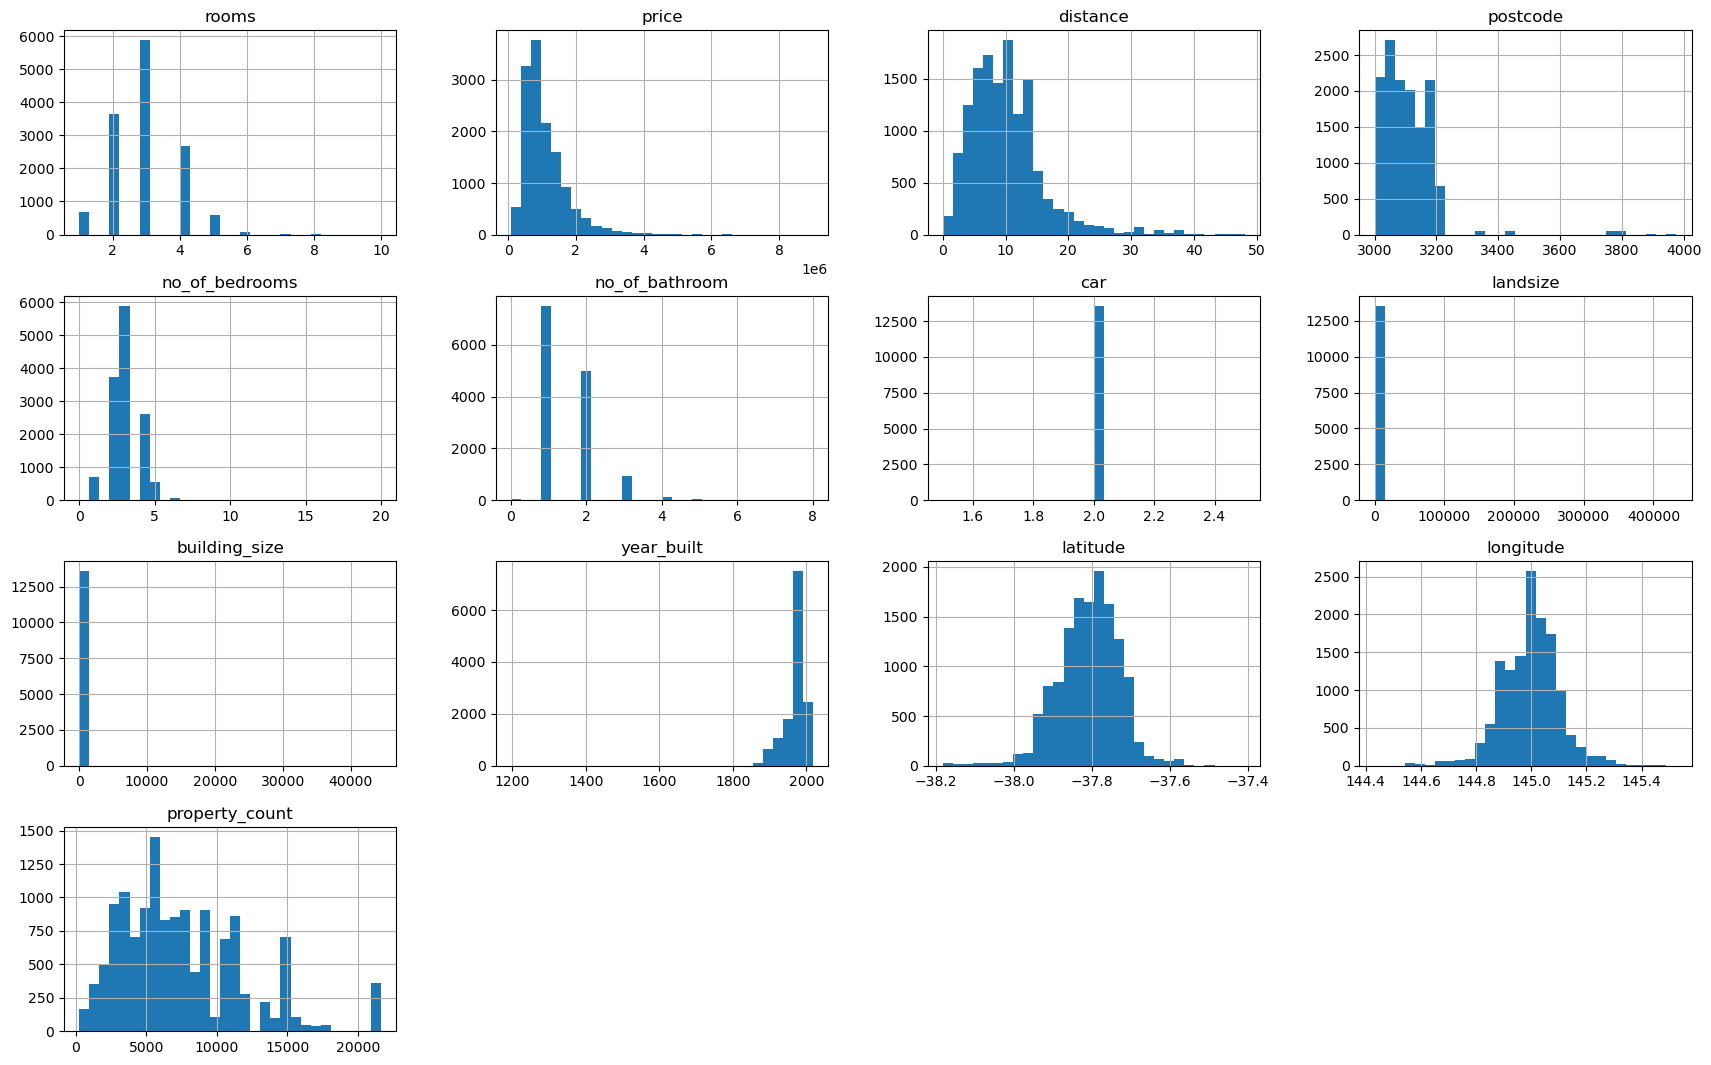

In [86]:
df.hist(bins=30, figsize=(21,13));


## Univariate Analysis 

### Data Distribution 

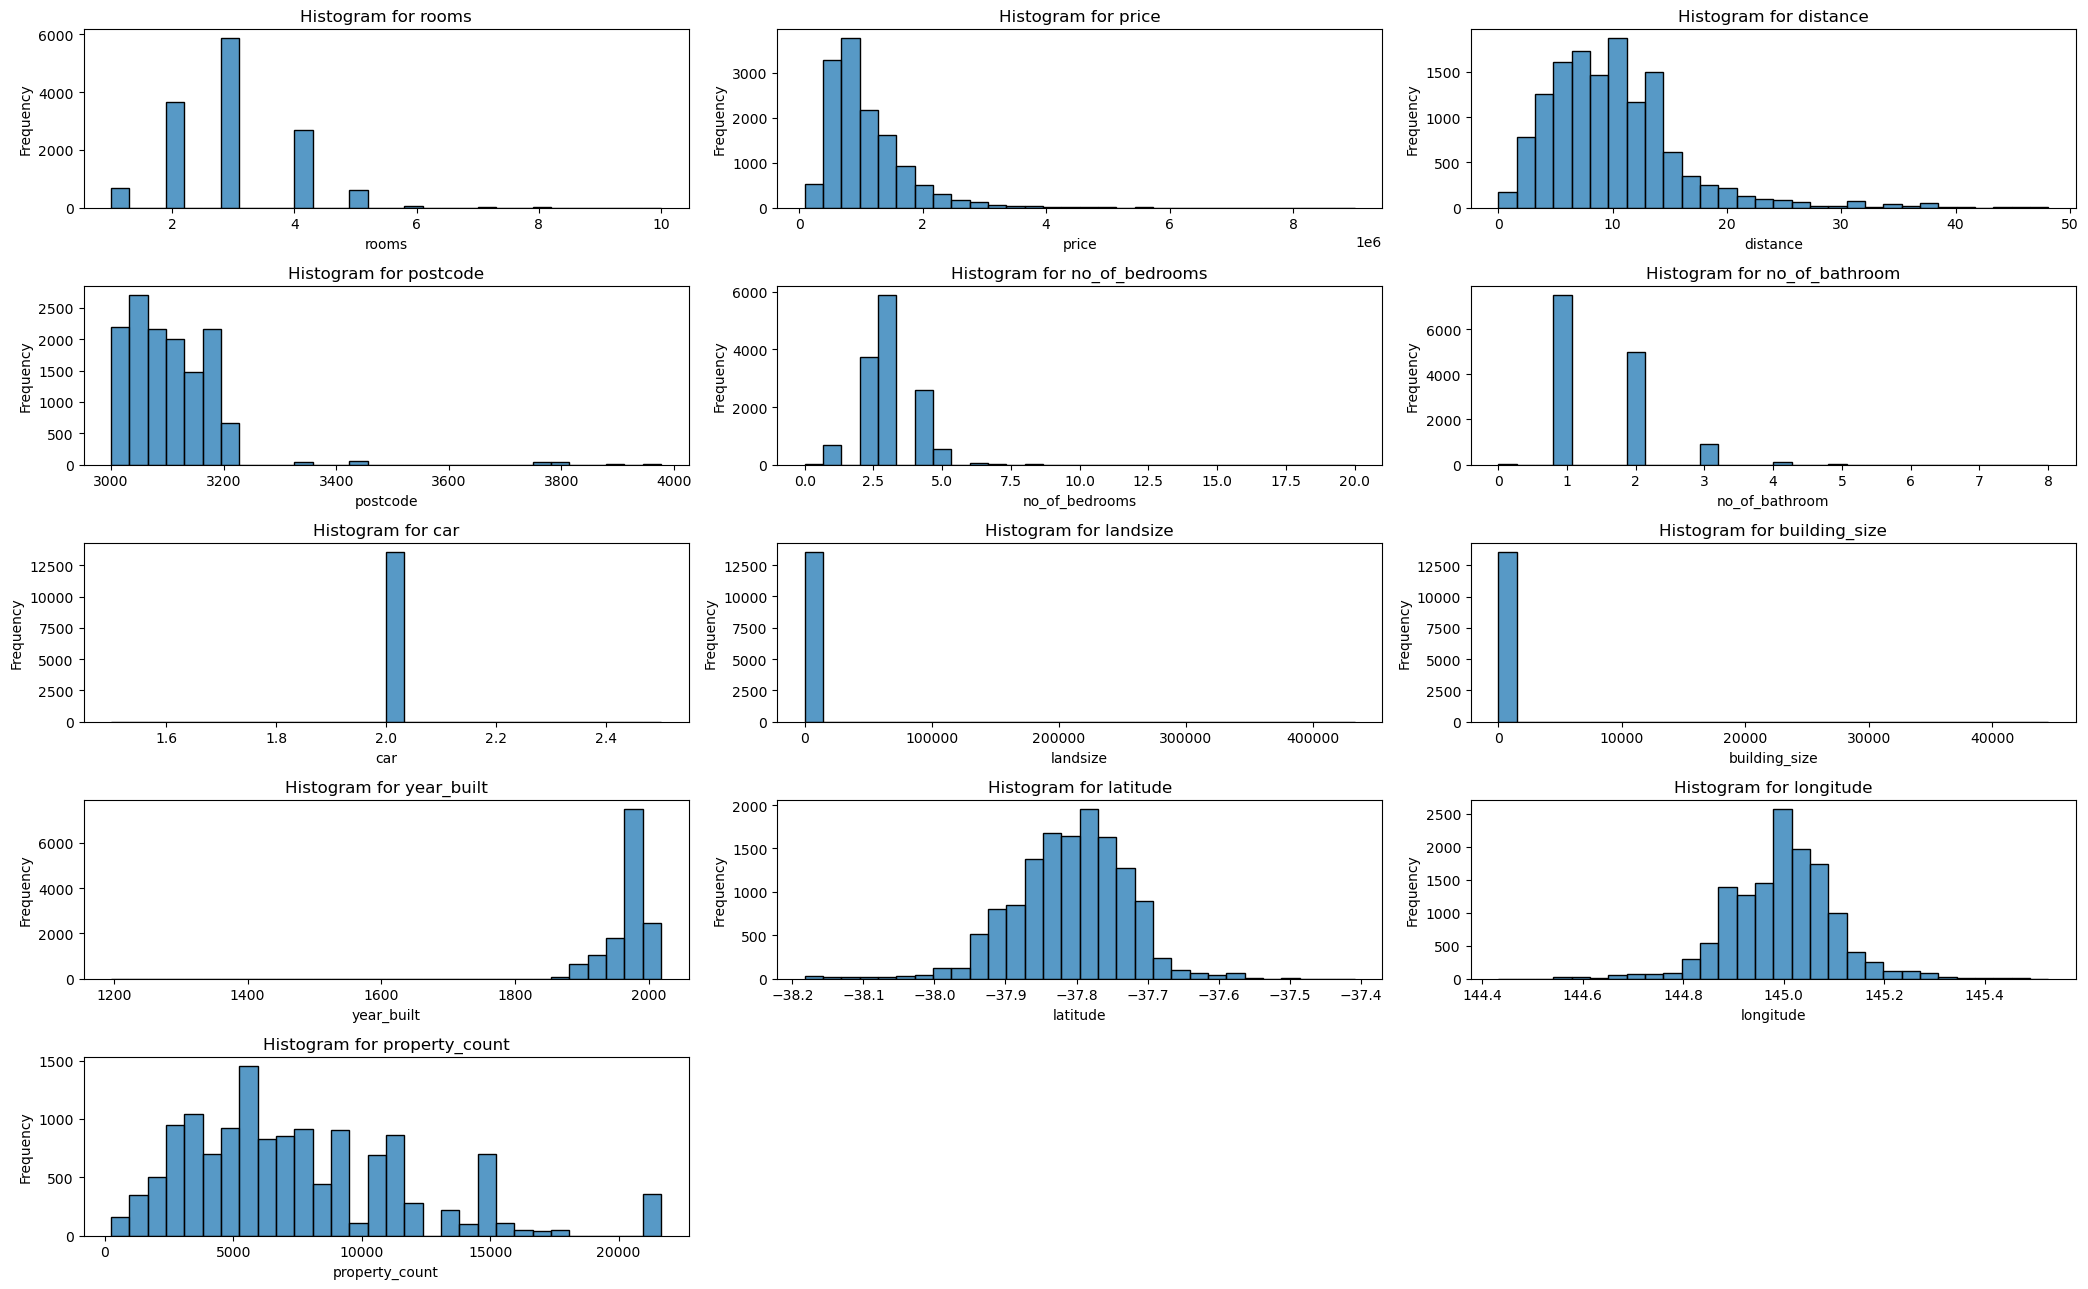

In [87]:
# Only select numeric columns 
numeric_columns = df.select_dtypes(include=['number']).columns[:]


# Define grd layout 
rows, cols = 5,3
fig, axes = plt.subplots(rows, cols, figsize=(21,13))

# Flatten the arrays 
axes = axes.flatten()

# Plot histograms for numeric columns 
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    
    
# Hide empty subplots 
for j in range (i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Observations 

- Latitude and longitude show normal distribution 

In [88]:
# Select categorical columns (object type)
cat_columns = df.select_dtypes(include=['O'])

print(cat_columns.columns)

Index(['suburb', 'address', 'types', 'method', 'real_estate_agent', 'date',
       'council_area', 'region_name'],
      dtype='object')


### For categorical columns 

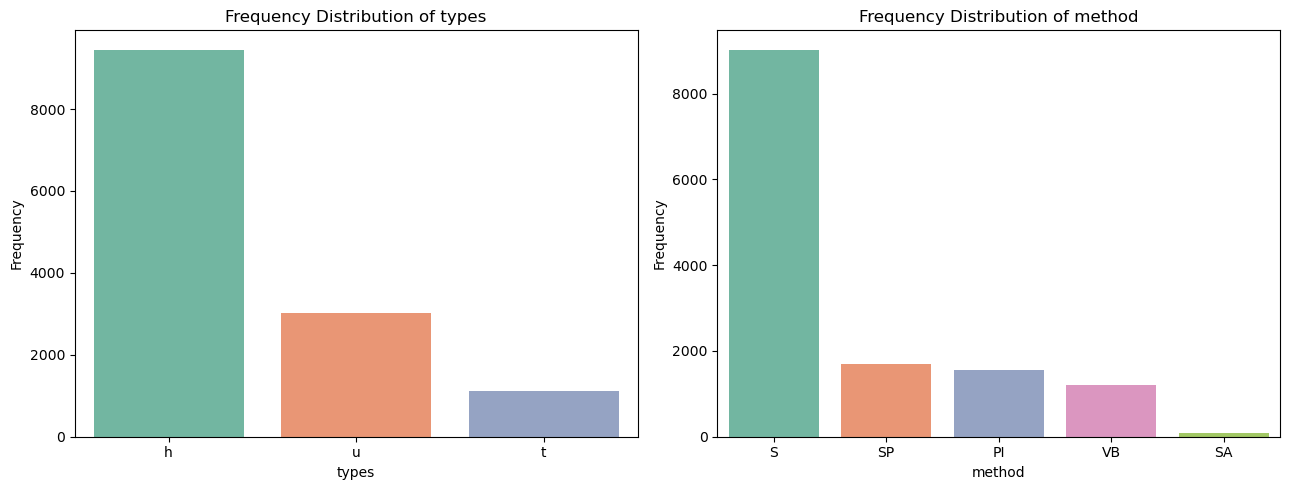

In [89]:
# Specify the categorical columns you want to plot
cat_columns = ['types', 'method']

# Define grid layout for the subplots
rows, cols = 1, 2  # Adjusted grid layout since you have 2 columns to plot
fig, axes = plt.subplots(rows, cols, figsize=(13, 5))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and plot using Seaborn's countplot
for i, column in enumerate(cat_columns):
    # Use Seaborn's countplot for categorical data
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', hue=column)
    
    # Set plot title and labels
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x labels for readability

plt.tight_layout()
plt.show()



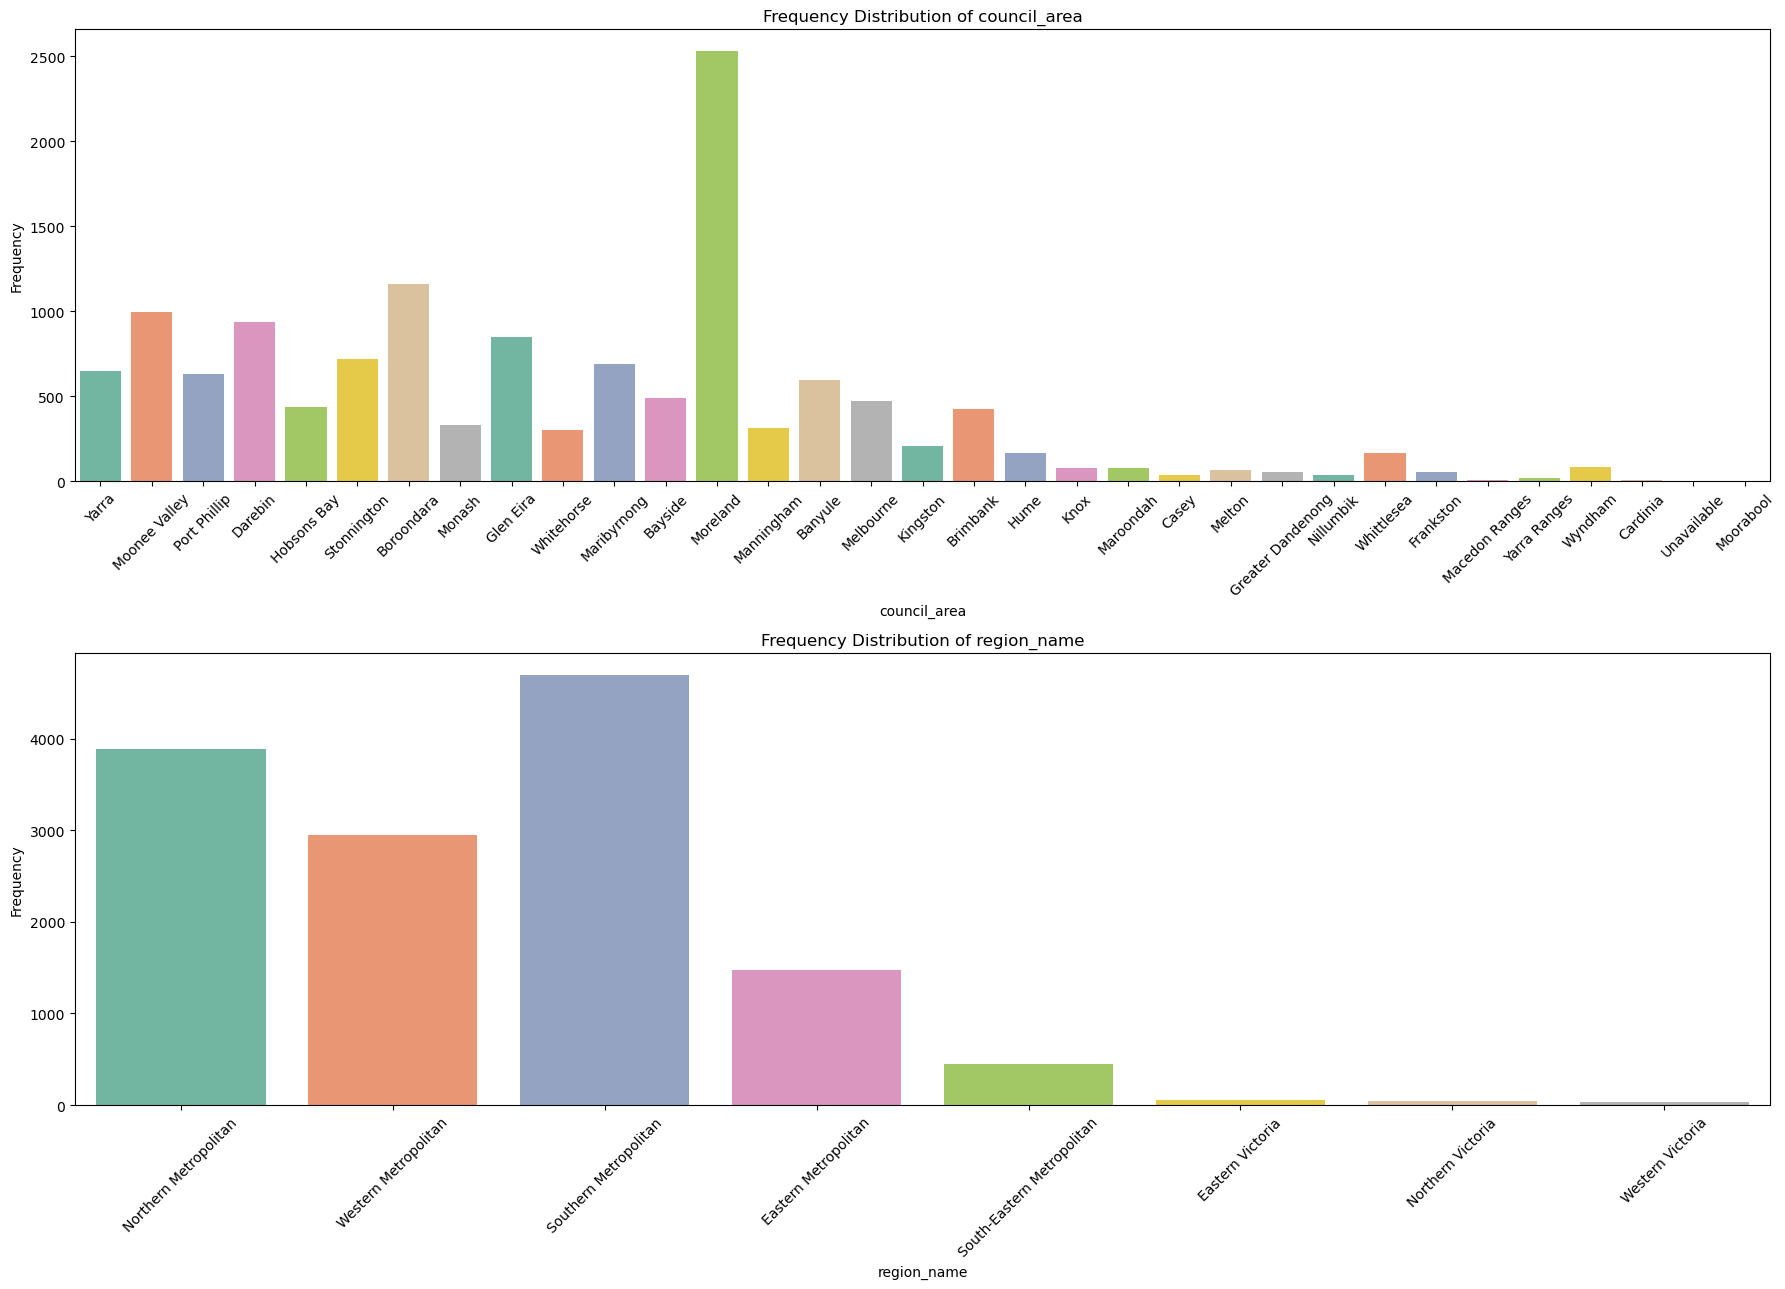

In [90]:
# Specify the categorical columns you want to plot
cat_columns = ['council_area', 'region_name']

# Define grid layout for the subplots
rows, cols = 2, 1  # Adjusted grid layout since you have 2 columns to plot
fig, axes = plt.subplots(rows, cols, figsize=(18, 13))

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Loop through each column and plot using Seaborn's countplot
for i, column in enumerate(cat_columns):
    # Use Seaborn's countplot for categorical data
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', hue=column)
    
    # Set plot title and labels
    axes[i].set_title(f'Frequency Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

plt.tight_layout()
plt.show()


### Outliers 
- Box plot is ideal for non-normal distributions

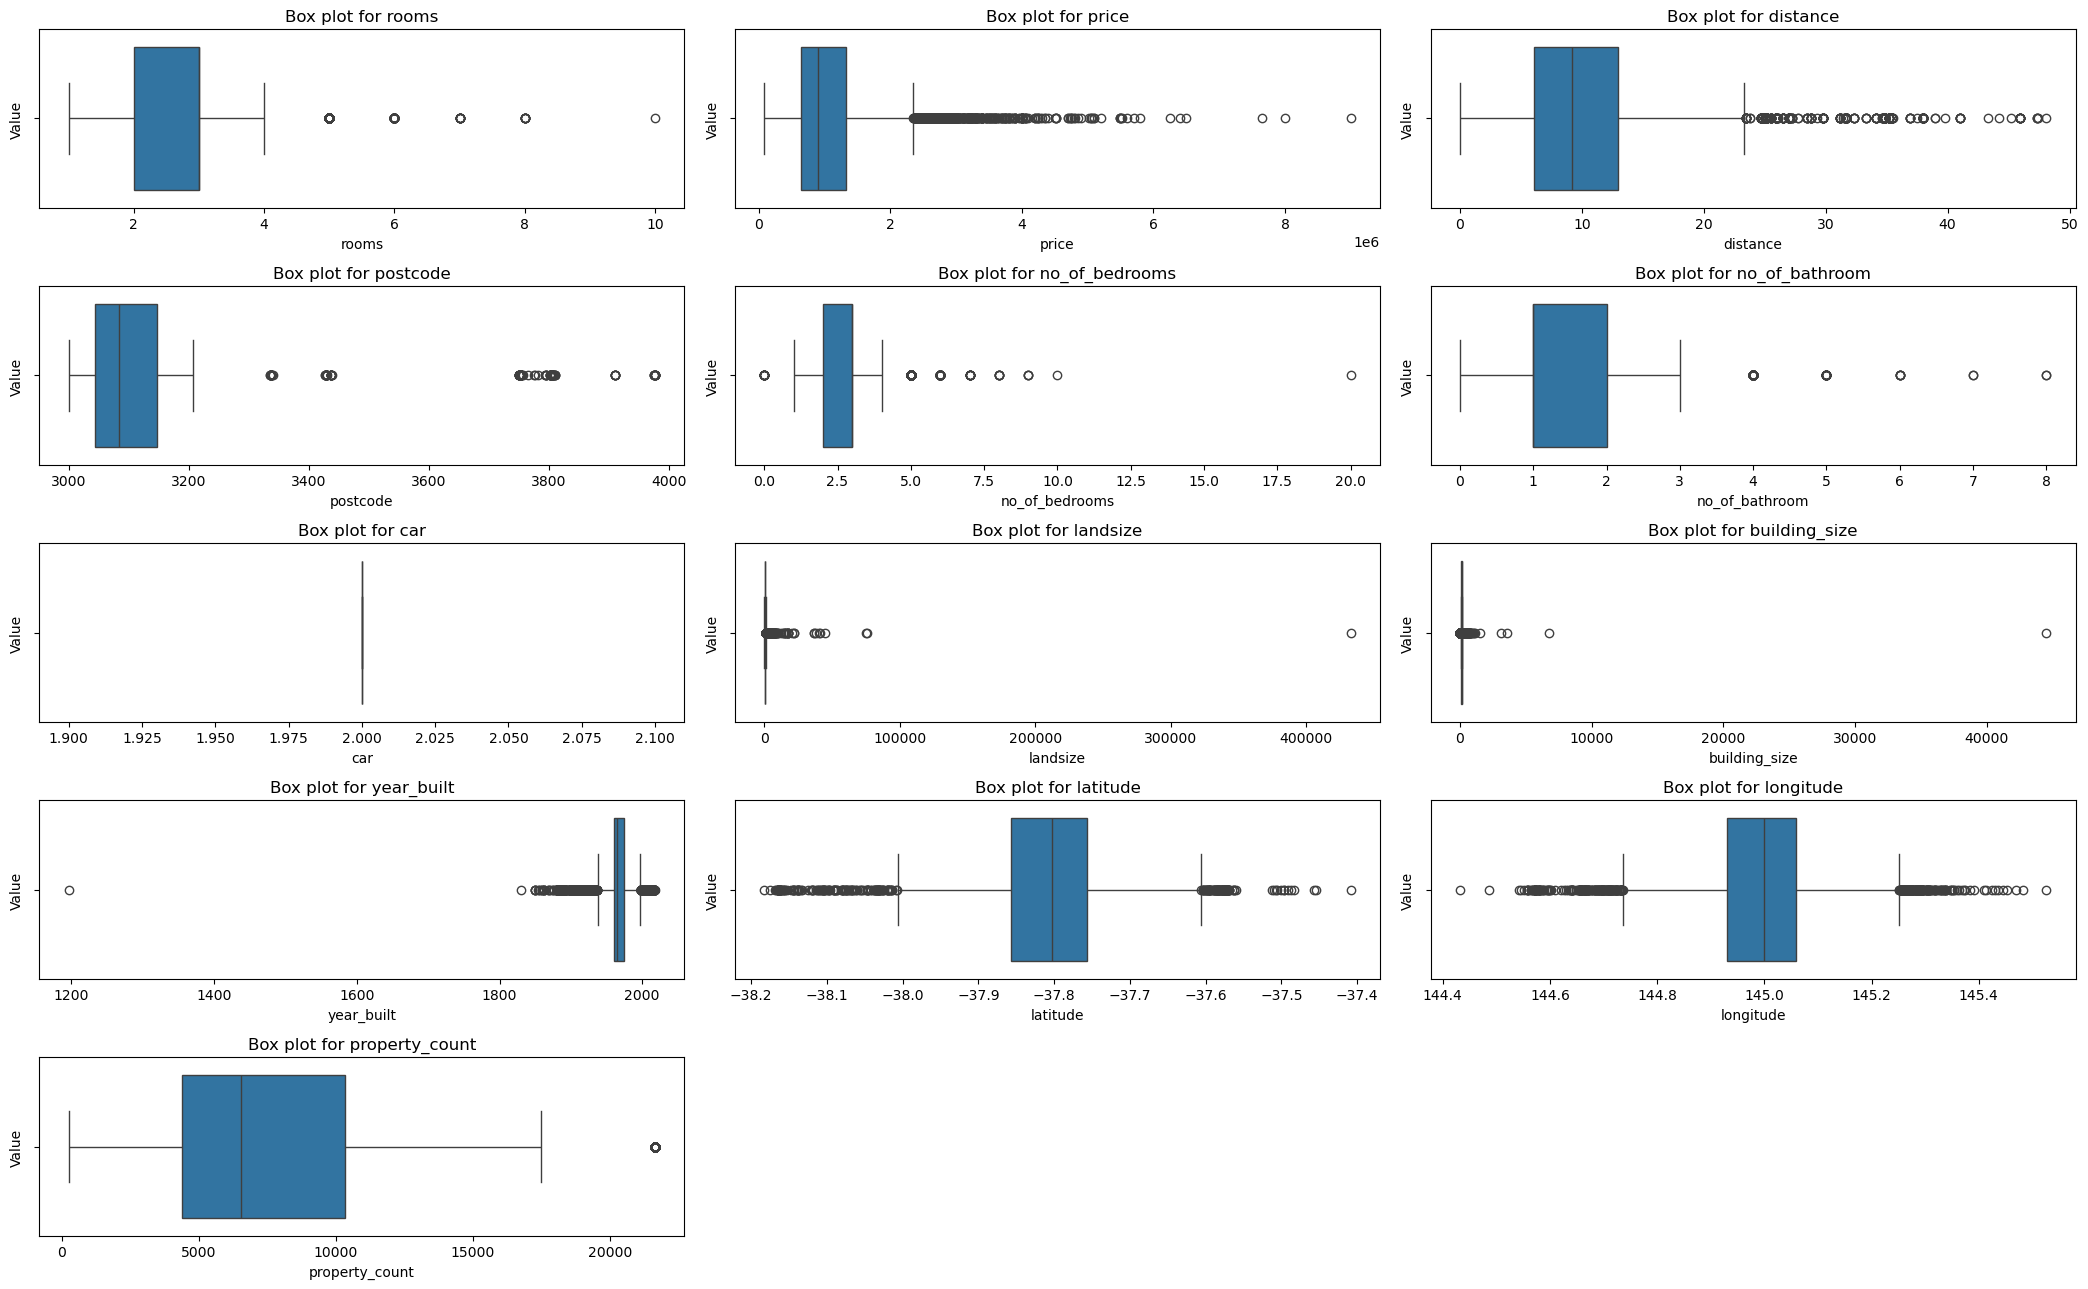

In [91]:
# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()


### Drop outliers 

In [92]:
# Create a copy of the data
data_copy = df.copy()
# Select only numeric columns
numeric_data = data_copy.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.20)  # .25
q3 = numeric_data.quantile(0.80)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(data_copy)

# Remove rows with outliers from the original DataFrame (important!)
data_copy = data_copy.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(data_copy)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = data_copy.copy()


Number of rows before removing outliers: 13580
Number of rows after removing outliers: 11174
Number of rows removed: 2406


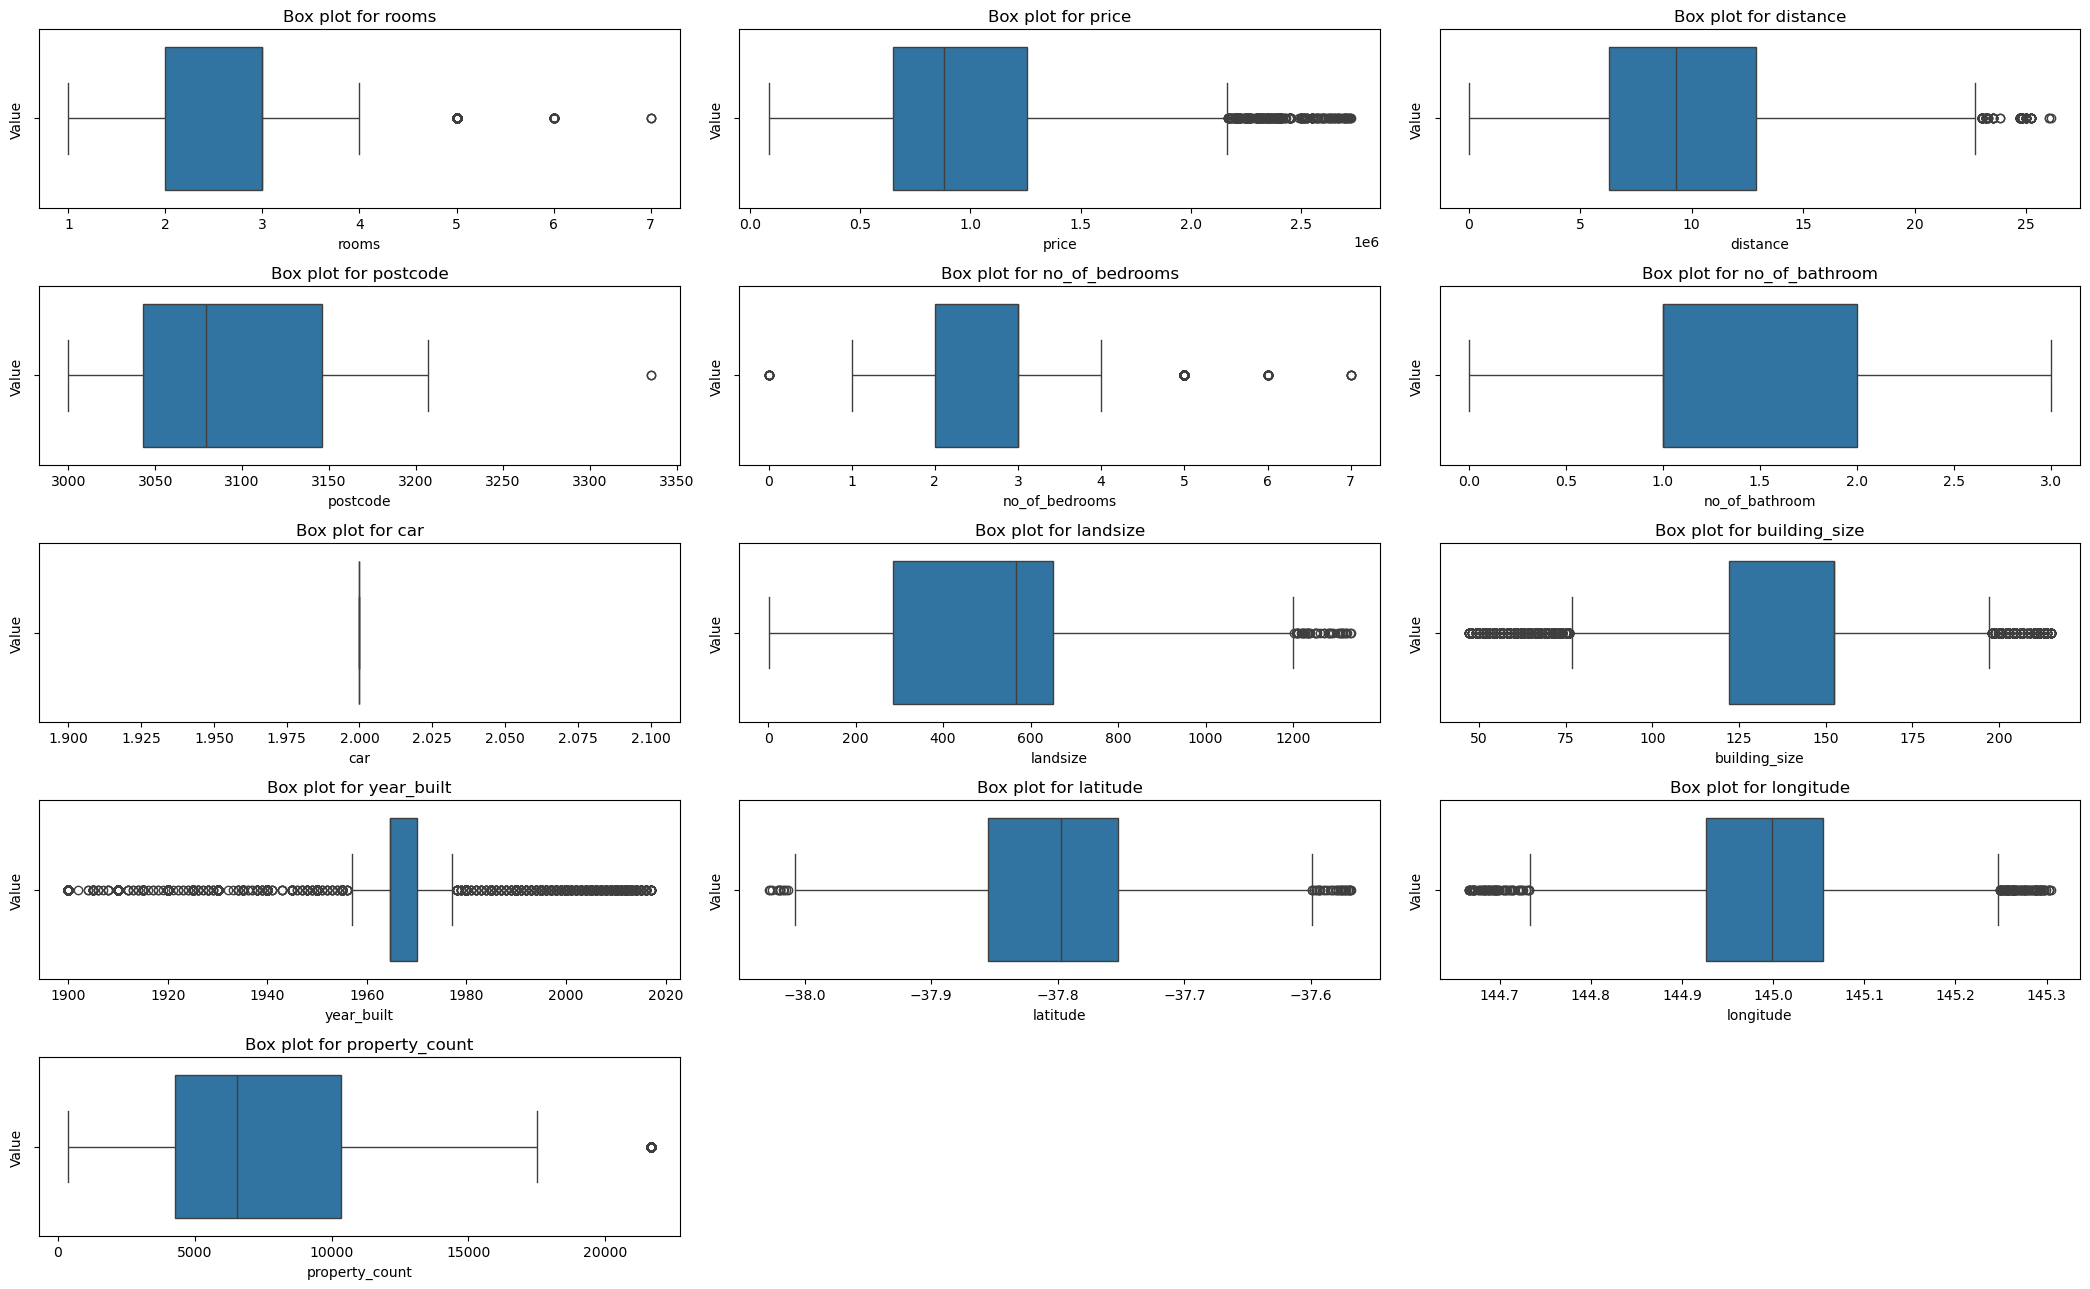

In [93]:
# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [94]:
print(df.columns)

Index(['suburb', 'address', 'rooms', 'types', 'price', 'method',
       'real_estate_agent', 'date', 'distance', 'postcode', 'no_of_bedrooms',
       'no_of_bathroom', 'car', 'landsize', 'building_size', 'year_built',
       'council_area', 'latitude', 'longitude', 'region_name',
       'property_count'],
      dtype='object')


In [95]:
num_columns = df.select_dtypes(include=['number'])
print(num_columns.columns)

Index(['rooms', 'price', 'distance', 'postcode', 'no_of_bedrooms',
       'no_of_bathroom', 'car', 'landsize', 'building_size', 'year_built',
       'latitude', 'longitude', 'property_count'],
      dtype='object')


### Suburb

In [96]:
df['suburb'].value_counts()

suburb
Reservoir         339
Bentleigh East    231
Preston           221
Richmond          215
Essendon          192
                 ... 
Wonga Park          1
Deepdene            1
Rockbank            1
Kooyong             1
Plumpton            1
Name: count, Length: 257, dtype: int64

In [97]:
df['suburb'].nunique()

257

### Type 

In [98]:
house_type = df['types'].value_counts().reset_index(name='house_type_count')
house_type

types  house_type_count
0     h              7603
1     u              2573
2     t               998

In [99]:
fig = px.bar(house_type, x='types',
            y='house_type_count', color= 'types',
            title = 'Different House Types')

fig.update_layout(width=950, height=400)

### Method

In [100]:
sales_method = df['method'].value_counts().reset_index(name='method_count')
sales_method

method  method_count
0      S          7562
1     SP          1412
2     PI          1211
3     VB           917
4     SA            72

In [101]:
fig = px.bar(sales_method, x='method',
            y='method_count', color= 'method',
            title = 'Different ways of selling a house')

fig.update_layout(width=950, height=400)

### Council Area

In [102]:
council_area = df['council_area'].value_counts().reset_index(name='count')
council_area

council_area  count
0            Moreland   2109
1       Moonee Valley    870
2             Darebin    852
3          Boroondara    843
4           Glen Eira    750
5         Maribyrnong    611
6         Stonnington    556
7             Banyule    526
8               Yarra    513
9        Port Phillip    488
10           Brimbank    408
11        Hobsons Bay    383
12          Melbourne    370
13            Bayside    365
14             Monash    306
15         Whitehorse    261
16         Manningham    257
17           Kingston    165
18               Hume    133
19         Whittlesea    126
20          Maroondah     70
21               Knox     64
22  Greater Dandenong     51
23            Wyndham     46
24          Nillumbik     30
25             Melton     20
26        Unavailable      1

In [103]:
fig = px.bar(council_area, x='council_area',
            y='count', color= 'council_area',
            title = 'Different Council Areas')

fig.update_layout(width=950, height=600)

## Multivariate analysis 

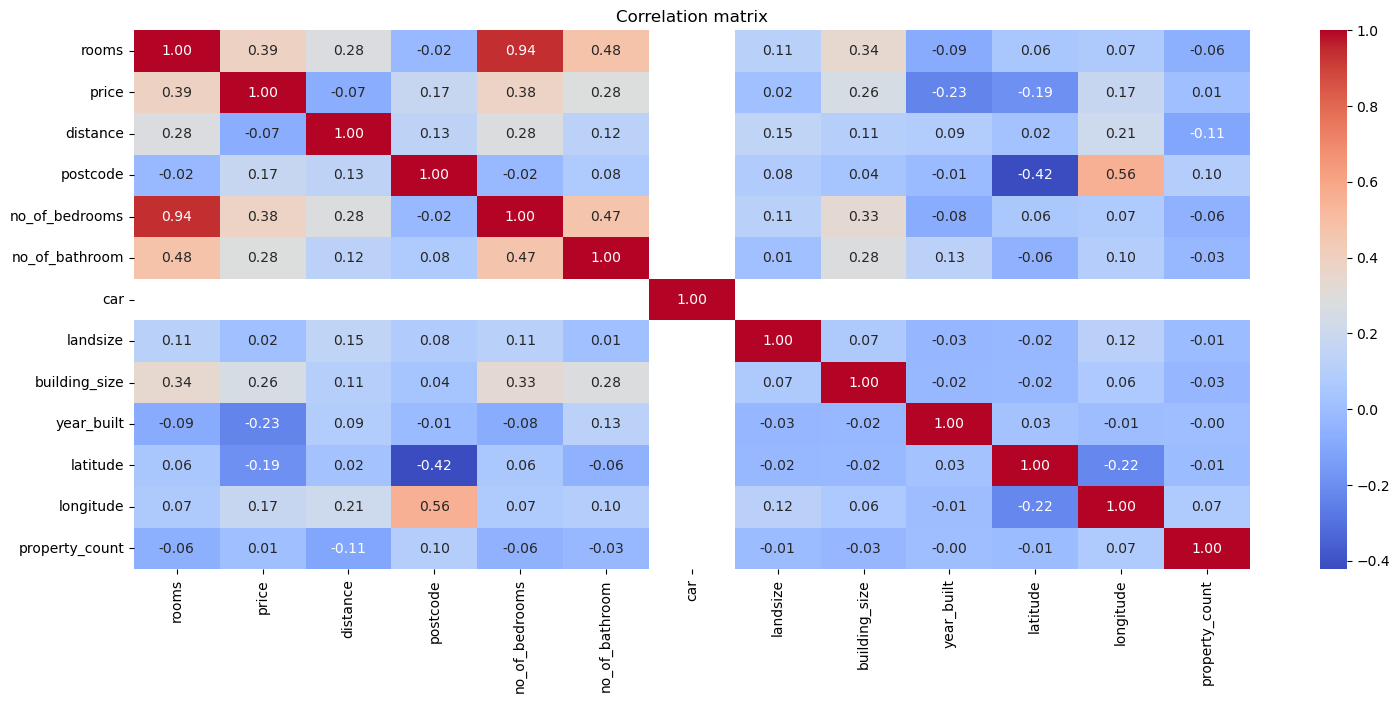

In [104]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='kendall')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

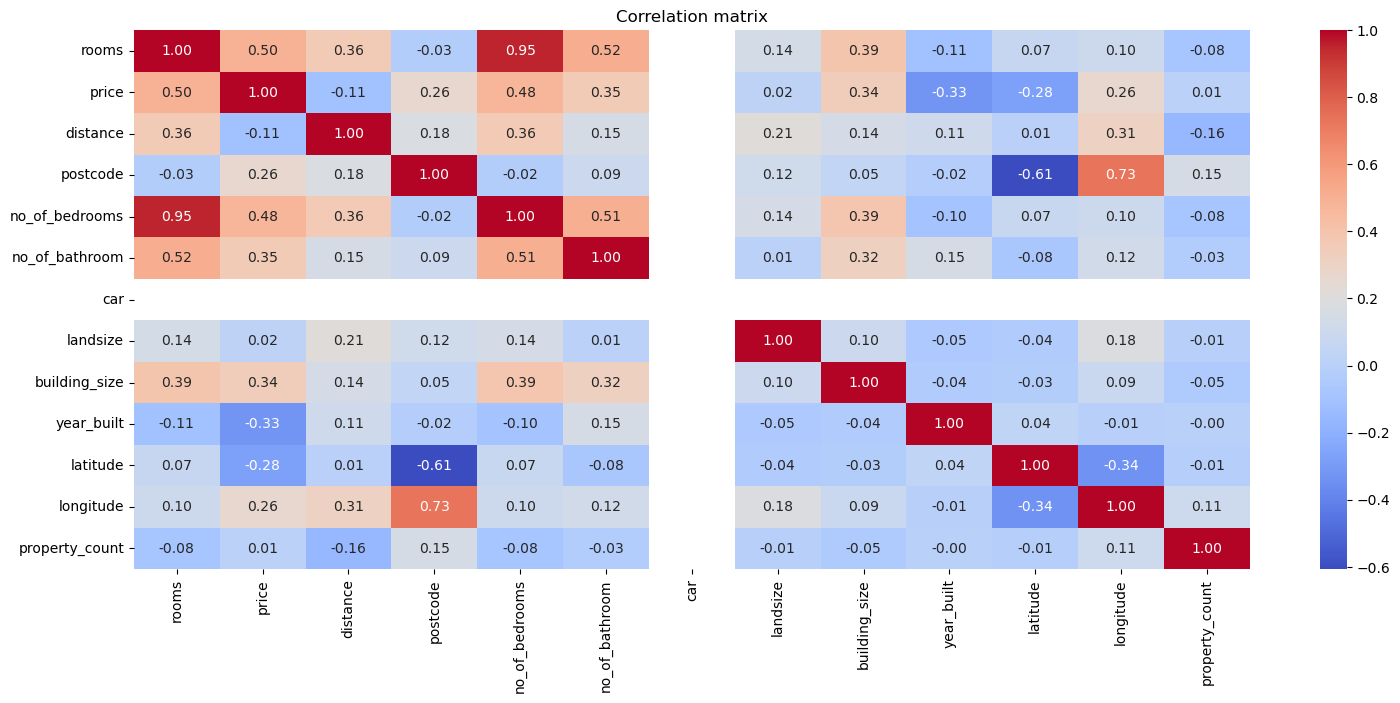

In [105]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='spearman')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

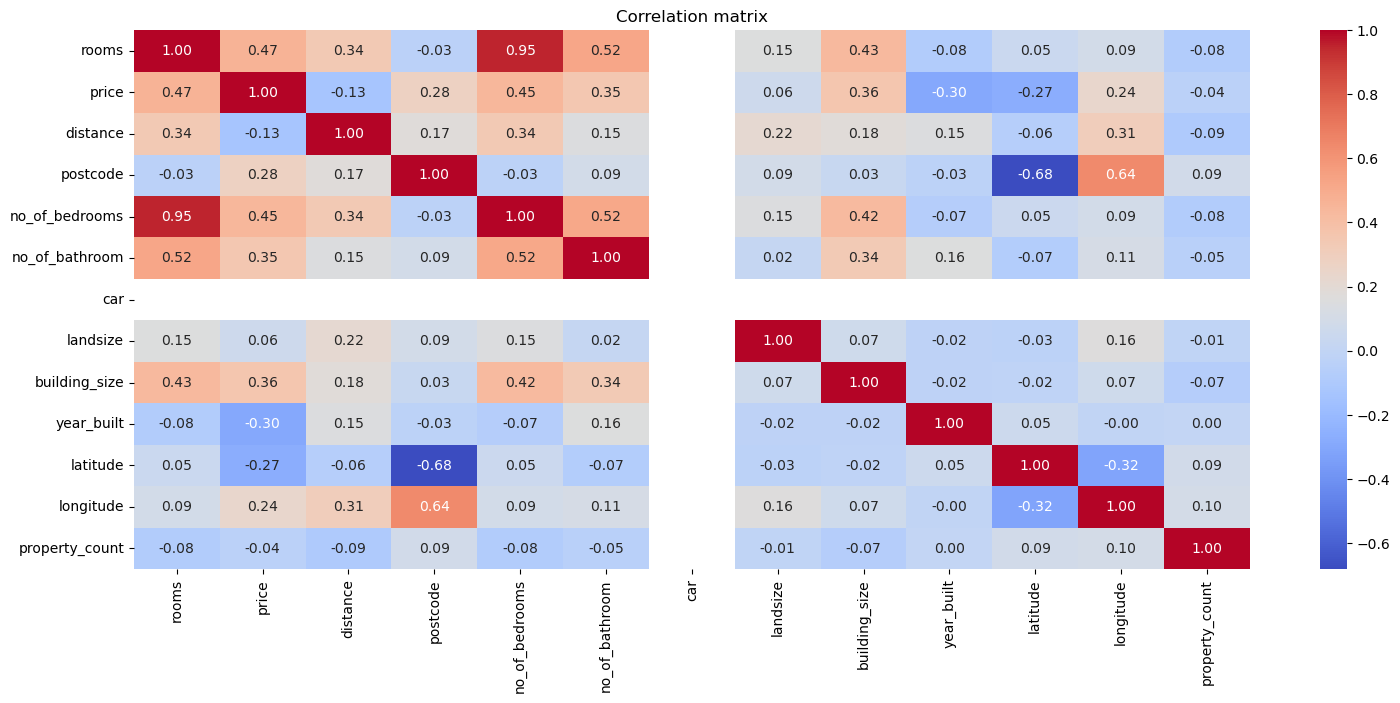

In [106]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Correlation matrix 
corr_matrix = df[numeric_columns].corr(method='pearson')

# Plot 
plt.figure(figsize=(18, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

### Combine number of bathroom and number of bedrooms to rooms 

In [107]:
df['total_rooms'] = df['rooms'] + df["no_of_bathroom"] + df['no_of_bedrooms']

# Correct column names for features
features = ['total_rooms']

# Scatter plots for Price vs Features grouped by Property Type
for feature in features:
    fig = px.scatter(
        df,
        x=feature,
        y='price',
        color='types',
        title=f'Price vs {feature.replace("_", " ").capitalize()} by Property Type',
        labels={feature: feature.replace("_", " ").capitalize(), 'price': 'Price'},
        opacity=0.7,
        template='plotly_white'
    )
    fig.show()

## Method, price and type

In [108]:
# Correct column names for features
features = ['method']

# Scatter plots for Price vs Features grouped by Property Type
for feature in features:
    fig = px.scatter(
        df,
        x=feature,
        y='price',
        color='types',
        title=f'Price vs {feature.replace("_", " ").capitalize()} by Property Type',
        labels={feature: feature.replace("_", " ").capitalize(), 'price': 'Price'},
        opacity=0.7,
        template='plotly_white'
    )
    fig.show()

In [109]:

# 1. Calculate Agent Performance Metrics
agent_performance = df.groupby('real_estate_agent').agg(
    average_price=('price', 'mean'),
    total_sales=('price', 'count')
).reset_index()

# 2. Add a Rank Column for Average Price and Total Sales
agent_performance['price_rank'] = agent_performance['average_price'].rank(ascending=False)
agent_performance['sales_rank'] = agent_performance['total_sales'].rank(ascending=False)

# Sort by Price Rank
agent_performance = agent_performance.sort_values(by='price_rank')

# Display Top Agents
top_agents = agent_performance.head(10)

top_agents

real_estate_agent  average_price  total_sales  price_rank  sales_rank
110             Lucas   2.450000e+06            1         1.0       201.0
19               Blue   2.180000e+06            1         2.0       201.0
214             White   2.035000e+06            1         3.0       201.0
103               LLC   2.020000e+06            1         4.0       201.0
208          WHITEFOX   1.820000e+06            1         5.0       201.0
95                Joe   1.800000e+06            1         6.5       201.0
65      Fletchers/One   1.800000e+06            1         6.5       201.0
99              Kelly   1.796667e+06            3         8.0       129.0
125           Meadows   1.770000e+06            1         9.0       201.0
180             Roger   1.750000e+06            1        10.0       201.0

In [110]:
# Plot Average Price by Agent (Top 10 by Price)
fig = px.bar(
    top_agents,
    x='real_estate_agent',
    y='average_price',
    title='Top 10 Agents by Average Sale Price',
    labels={'real_estate_agent': 'Agent', 'average_price': 'Average Price'},
    color='average_price',
    color_continuous_scale='Viridis'
)
fig.update_layout(template='plotly_white', xaxis_tickangle=45)
fig.show()



In [111]:
# 4. Plot Total Sales by Agent (Top 10 by Frequency)
top_sales_agents = agent_performance.sort_values(by='sales_rank').head(10)

fig = px.bar(
    top_sales_agents,
    x='real_estate_agent',
    y='total_sales',
    title='Top 10 Agents by Total Sales',
    labels={'real_estate_agent': 'Agent', 'total_sales': 'Total Sales'},
    color='total_sales',
    color_continuous_scale='Plasma'
)
fig.update_layout(template='plotly_white', xaxis_tickangle=45)
fig.show()



In [112]:
# 5. Combined Metrics (Scatter Plot: Average Price vs Total Sales)
fig = px.scatter(
    agent_performance,
    x='total_sales',
    y='average_price',
    size='total_sales',
    color='average_price',
    title='Agent Performance: Average Price vs Total Sales',
    labels={'total_sales': 'Total Sales', 'average_price': 'Average Price'},
    hover_data=['real_estate_agent', 'price_rank', 'sales_rank'],
    template='plotly_white',
    color_continuous_scale='Magma'
)
fig.show()

## Monthly Mean house prices 

In [113]:
# Correctly parse the date column (assuming MM/DD/YYYY format)
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')


# Extract year and month for additional analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


# Cyclical features for month
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df.head()




suburb           address  rooms types      price method  \
0  Abbotsford      85 Turner St    2.0     h  1480000.0      S   
1  Abbotsford   25 Bloomburg St    2.0     h  1035000.0      S   
2  Abbotsford      5 Charles St    3.0     h  1465000.0     SP   
3  Abbotsford  40 Federation La    3.0     h   850000.0     PI   
4  Abbotsford       55a Park St    4.0     h  1600000.0     VB   

  real_estate_agent       date  distance  postcode  no_of_bedrooms  \
0            Biggin 2016-12-03       2.5    3067.0             2.0   
1            Biggin 2016-02-04       2.5    3067.0             2.0   
2            Biggin 2017-03-04       2.5    3067.0             3.0   
3            Biggin 2017-03-04       2.5    3067.0             3.0   
4            Nelson 2016-06-04       2.5    3067.0             3.0   

   no_of_bathroom  car  landsize  building_size   year_built council_area  \
0             1.0  2.0     202.0     152.330851  1964.684217        Yarra   
1             1.0  2.0     156.0      79.000000  1900.000000        Yarra   
2             2.0  2.0     134.0     150.000000  1900.000000        Yarra   
3             2.0  2.0      94.0     152.330851  1964.684217        Yarra   
4             1.0  2.0     120.0     142.000000  2014.000000        Yarra   

   latitude  longitude            region_name  property_count  total_rooms  \
0  -37.7996   144.9984  Northern Metropolitan          4019.0          5.0   
1  -37.8079   144.9934  Northern Metropolitan          4019.0          5.0   
2  -37.8093   144.9944  Northern Metropolitan          4019.0          8.0   
3  -37.7969   144.9969  Northern Metropolitan          4019.0          8.0   
4  -37.8072   144.9941  Northern Metropolitan          4019.0          8.0   

   year  month     month_sin     month_cos  
0  2016     12 -2.449294e-16  1.000000e+00  
1  2016      2  8.660254e-01  5.000000e-01  
2  2017      3  1.000000e+00  6.123234e-17  
3  2017      3  1.000000e+00  6.123234e-17  
4  2016      6  1.224647e-16 -1.000000e+00

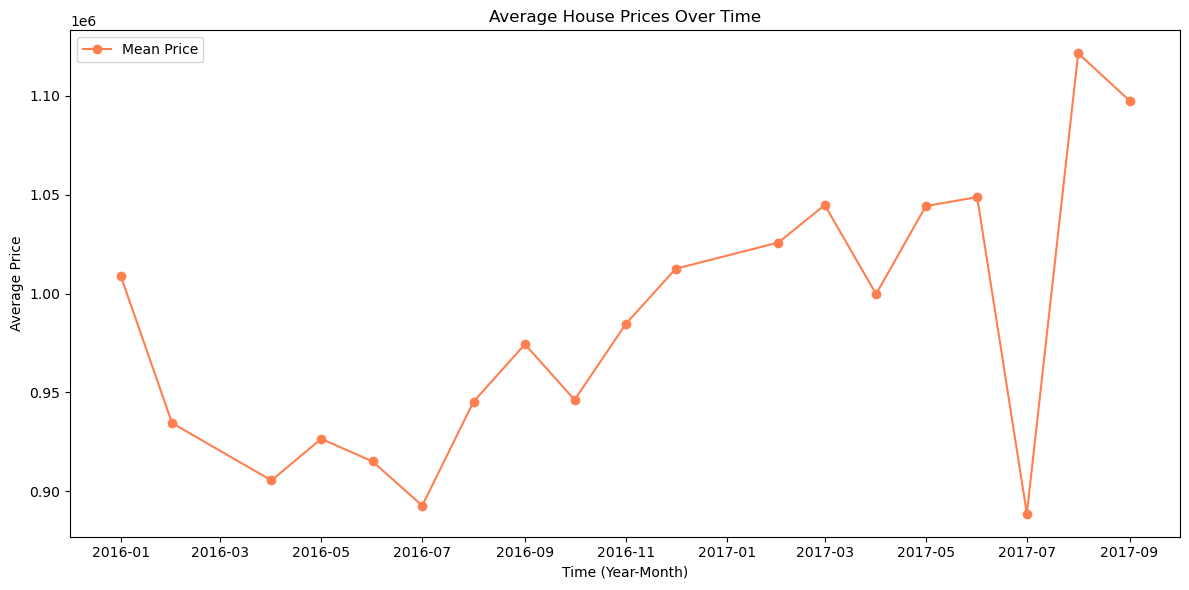

In [114]:
# Ensure 'Date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate by year and month to calculate the mean price
monthly_trend = df.groupby(df['date'].dt.to_period('M'))['price'].mean()

# Reset index to use for plotting
monthly_trend = monthly_trend.reset_index()
monthly_trend['date'] = monthly_trend['date'].dt.to_timestamp()

# Plot the monthly price trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['date'], monthly_trend['price'], marker='o', color='coral', label='Mean Price', )
plt.title('Average House Prices Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Price')
# plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [115]:
import plotly.express as px

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Aggregate by year and month to calculate the mean price
monthly_trend = df.groupby(df['date'].dt.to_period('M'))['price'].mean()

# Reset index to use for plotting
monthly_trend = monthly_trend.reset_index()
monthly_trend['date'] = monthly_trend['date'].dt.to_timestamp()

# Plot using Plotly Express
fig = px.line(
    monthly_trend,
    x='date',
    y='price',
    title='Average House Prices Over Time',
    labels={'date': 'Time (Year-Month)', 'price': 'Average Price'},
    markers=True
)

# Customize layout
fig.update_traces(line_color='coral')
fig.update_layout(
    xaxis_title='Time (Year-Month)',
    yaxis_title='Average Price',
    template='plotly_white'
)

# Show the plot
fig.show()


In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# time 
import time

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11174 entries, 0 to 13579
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   suburb             11174 non-null  object        
 1   address            11174 non-null  object        
 2   rooms              11174 non-null  float64       
 3   types              11174 non-null  object        
 4   price              11174 non-null  float64       
 5   method             11174 non-null  object        
 6   real_estate_agent  11174 non-null  object        
 7   date               11174 non-null  datetime64[ns]
 8   distance           11174 non-null  float64       
 9   postcode           11174 non-null  float64       
 10  no_of_bedrooms     11174 non-null  float64       
 11  no_of_bathroom     11174 non-null  float64       
 12  car                11174 non-null  float64       
 13  landsize           11174 non-null  float64       
 14  building_si

In [118]:
df = df.drop(columns=["address",'suburb','real_estate_agent', 'date', 
                      'postcode', 'car'], axis=1, errors='ignore')

cat_columns = df.select_dtypes(include=['object'])
cat_columns.columns

Index(['types', 'method', 'council_area', 'region_name'], dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11174 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rooms           11174 non-null  float64
 1   types           11174 non-null  object 
 2   price           11174 non-null  float64
 3   method          11174 non-null  object 
 4   distance        11174 non-null  float64
 5   no_of_bedrooms  11174 non-null  float64
 6   no_of_bathroom  11174 non-null  float64
 7   landsize        11174 non-null  float64
 8   building_size   11174 non-null  float64
 9   year_built      11174 non-null  float64
 10  council_area    11174 non-null  object 
 11  latitude        11174 non-null  float64
 12  longitude       11174 non-null  float64
 13  region_name     11174 non-null  object 
 14  property_count  11174 non-null  float64
 15  total_rooms     11174 non-null  float64
 16  year            11174 non-null  int32  
 17  month           11174 non-null  int3

In [120]:
# Check for missing values in categorical columns
print(df[categorical_columns].isnull().sum())


types           0
method          0
council_area    0
region_name     0
dtype: int64


In [121]:
# Drop columns with only one unique value
categorical_columns = [col for col in categorical_columns if df[col].nunique() > 1]


In [122]:
categorical_columns 

['types', 'method', 'council_area', 'region_name']

### One hot encoding 

In [123]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['types', 'method', 'council_area', 'region_name']

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df= encoded_df.copy()

df.head()

rooms      price  distance  no_of_bedrooms  no_of_bathroom  landsize  \
0    2.0  1480000.0       2.5             2.0             1.0     202.0   
1    2.0  1035000.0       2.5             2.0             1.0     156.0   
2    3.0  1465000.0       2.5             3.0             2.0     134.0   
3    3.0   850000.0       2.5             3.0             2.0      94.0   
4    4.0  1600000.0       2.5             3.0             1.0     120.0   

   building_size   year_built  latitude  longitude  property_count  \
0     152.330851  1964.684217  -37.7996   144.9984          4019.0   
1      79.000000  1900.000000  -37.8079   144.9934          4019.0   
2     150.000000  1900.000000  -37.8093   144.9944          4019.0   
3     152.330851  1964.684217  -37.7969   144.9969          4019.0   
4     142.000000  2014.000000  -37.8072   144.9941          4019.0   

   total_rooms    year  month     month_sin     month_cos  types_t  types_u  \
0          5.0  2016.0   12.0 -2.449294e-16  1.000000e+00      0.0      0.0   
1          5.0  2016.0    2.0  8.660254e-01  5.000000e-01      0.0      0.0   
2          8.0  2017.0    3.0  1.000000e+00  6.123234e-17      0.0      0.0   
3          8.0  2017.0    3.0  1.000000e+00  6.123234e-17      0.0      0.0   
4          8.0  2016.0    6.0  1.224647e-16 -1.000000e+00      0.0      0.0   

   method_S  method_SA  method_SP  method_VB  method_nan  \
0       1.0        0.0        0.0        0.0         0.0   
1       1.0        0.0        0.0        0.0         0.0   
2       0.0        0.0        1.0        0.0         0.0   
3       0.0        0.0        0.0        0.0         0.0   
4       0.0        0.0        0.0        1.0         0.0   

   council_area_Bayside  council_area_Boroondara  council_area_Brimbank  \
0                   0.0                      0.0                    0.0   
1                   0.0                      0.0                    0.0   
2                   0.0                      0.0                    0.0   
3                   0.0                      0.0                    0.0   
4                   0.0                      0.0                    0.0   

   council_area_Darebin  council_area_Glen Eira  \
0                   0.0                     0.0   
1                   0.0                     0.0   
2                   0.0                     0.0   
3                   0.0                     0.0   
4                   0.0                     0.0   

   council_area_Greater Dandenong  council_area_Hobsons Bay  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   

   council_area_Hume  council_area_Kingston  council_area_Knox  \
0                0.0                    0.0                0.0   
1                0.0                    0.0                0.0   
2                0.0                    0.0                0.0   
3                0.0                    0.0                0.0   
4                0.0                    0.0                0.0   

   council_area_Manningham  council_area_Maribyrnong  council_area_Maroondah  \
0                      0.0                       0.0                     0.0   
1                      0.0                       0.0                     0.0   
2                      0.0                       0.0                     0.0   
3                      0.0                       0.0                     0.0   
4                      0.0                       0.0                     0.0   

   council_area_Melbourne  council_area_Melton  council_area_Monash  \
0                     0.0                  0.0                  0.0   
1                     0.0                  0.0                  0.0   
2                     0.0                  0.0                  0.0

### Feature selection 

In [124]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Drop null values
# df = df.dropna()

# # Defining the dependent variables/features
# X = df.drop(columns=['price'])

# # Target variable
# y = df['price']

# # Split into training and temporary sets (70% train, 30% temp)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

# # Split the temporary set into validation and test sets (50% each)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# # Columns to scale
# columns_to_scale = ['rooms', 'distance', 'no_of_bedrooms', 'no_of_bathroom', 'car', 'landsize',
#                     'latitude', 'longitude', 
#                    'property_count', 'total_rooms']

# # Initialize the standard scaler
# scaler = StandardScaler()

# # Fit and transform the specified columns in the training data
# X_train_scaled = X_train.copy()
# X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# # Transform the specified columns in the validation and test data
# X_val_scaled = X_val.copy()
# X_val_scaled[columns_to_scale] = scaler.transform(X_val[columns_to_scale])

# X_test_scaled = X_test.copy()
# X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [125]:

# Define the features and target variable 

# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'price'})

# Target variable 
y = df['price']




# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=127)

In [126]:
# Columns having select values
#df.columns[df.isin(['t']).any()]

In [127]:
#df['type'].unique()

In [128]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)



In [129]:
# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'LGBM Regressor': LGBMRegressor(verbose=0),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(8)

Model            MAE           MSE           RMSE       MAPE  \
0       Decision Tree  204373.203654  8.916759e+10  298609.421375  22.116693   
1         Extra Trees  148570.645132  4.592413e+10  214299.161067  16.526910   
2       Random Forest  141951.916038  4.248784e+10  206125.794750  15.710639   
3   Gradient Boosting  160480.524269  5.074904e+10  225275.476846  18.135744   
4      KNN Regression  298326.764213  1.550159e+11  393720.639729  37.097007   
5      LGBM Regressor  138126.443231  3.956931e+10  198920.357857  15.103705   
6  CatBoost Regressor  130801.061504  3.515691e+10  187501.764368  14.330149   
7       XGB Regressor  142484.178600  4.050321e+10  201254.104877  15.554654   

         R2  Training Time (s)  Prediction Time (s)  
0  0.581072           0.223167             0.001143  
1  0.784239           7.384957             0.068632  
2  0.800383           8.274957             0.055750  
3  0.761571           1.731154             0.004249  
4  0.271703           0.002886             0.064614  
5  0.814095           0.113037             0.005759  
6  0.834826           2.248557             0.003872  
7  0.809708           0.247039             0.002694

In [130]:
# Plotting a grouped bar graph

fig = px.bar(results_df, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()

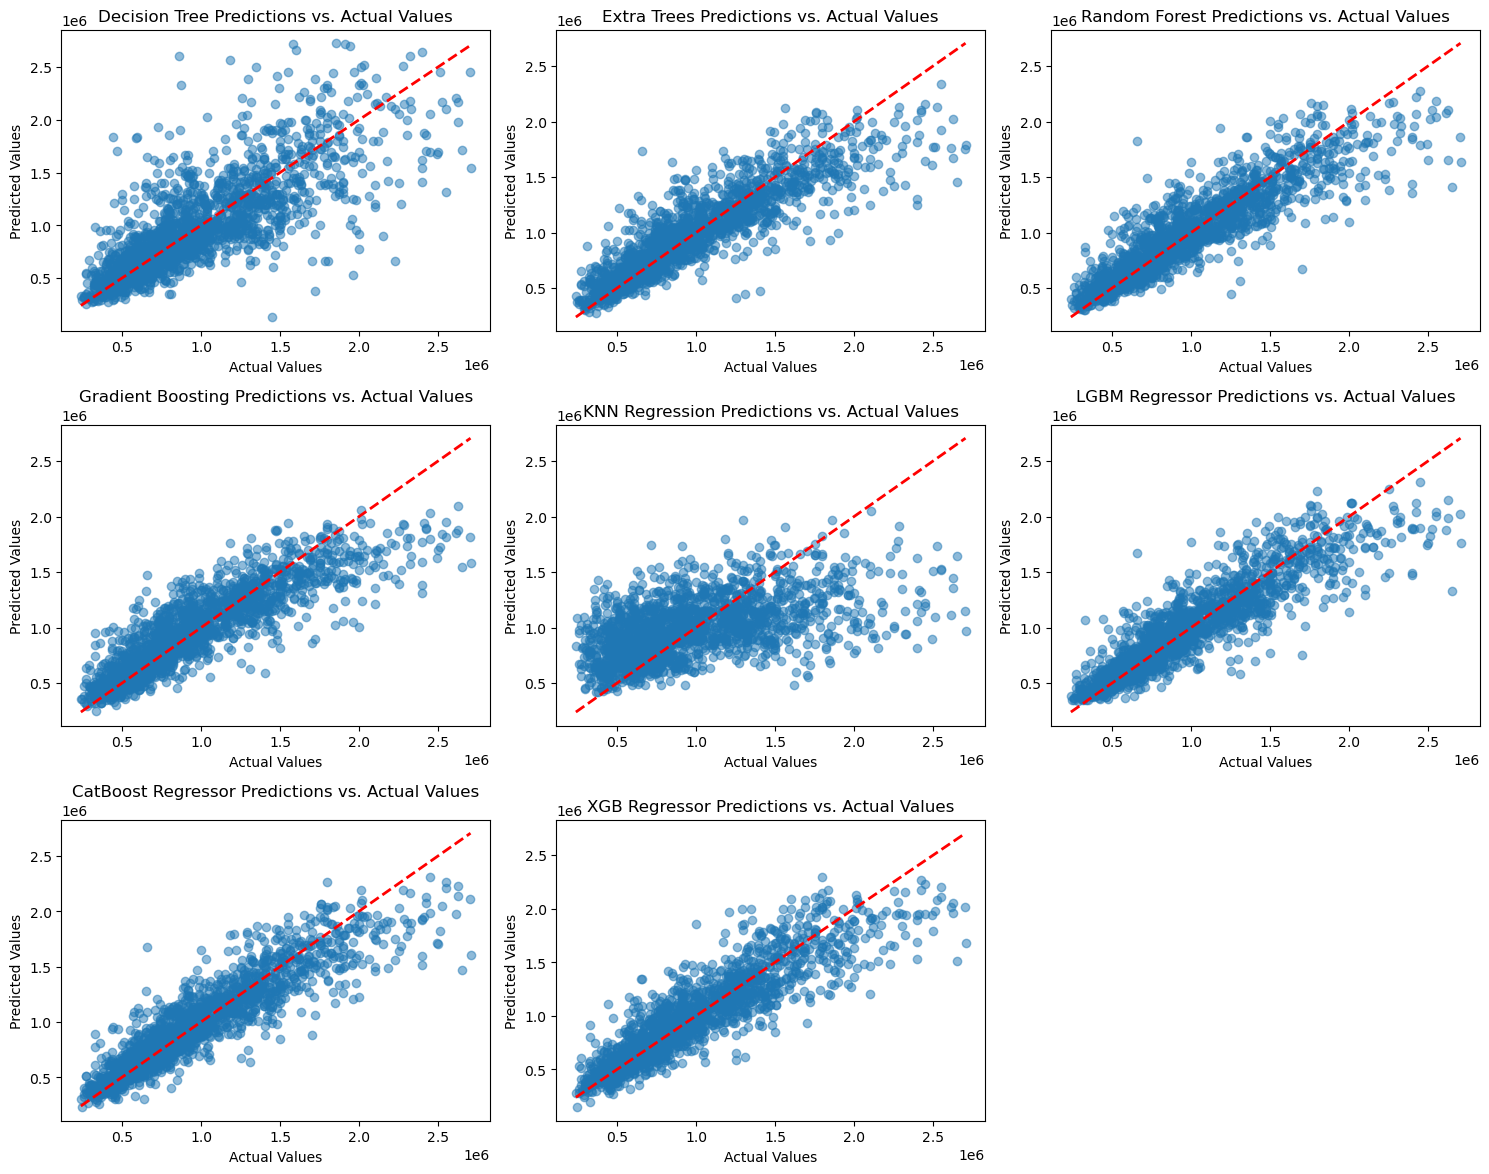

In [131]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

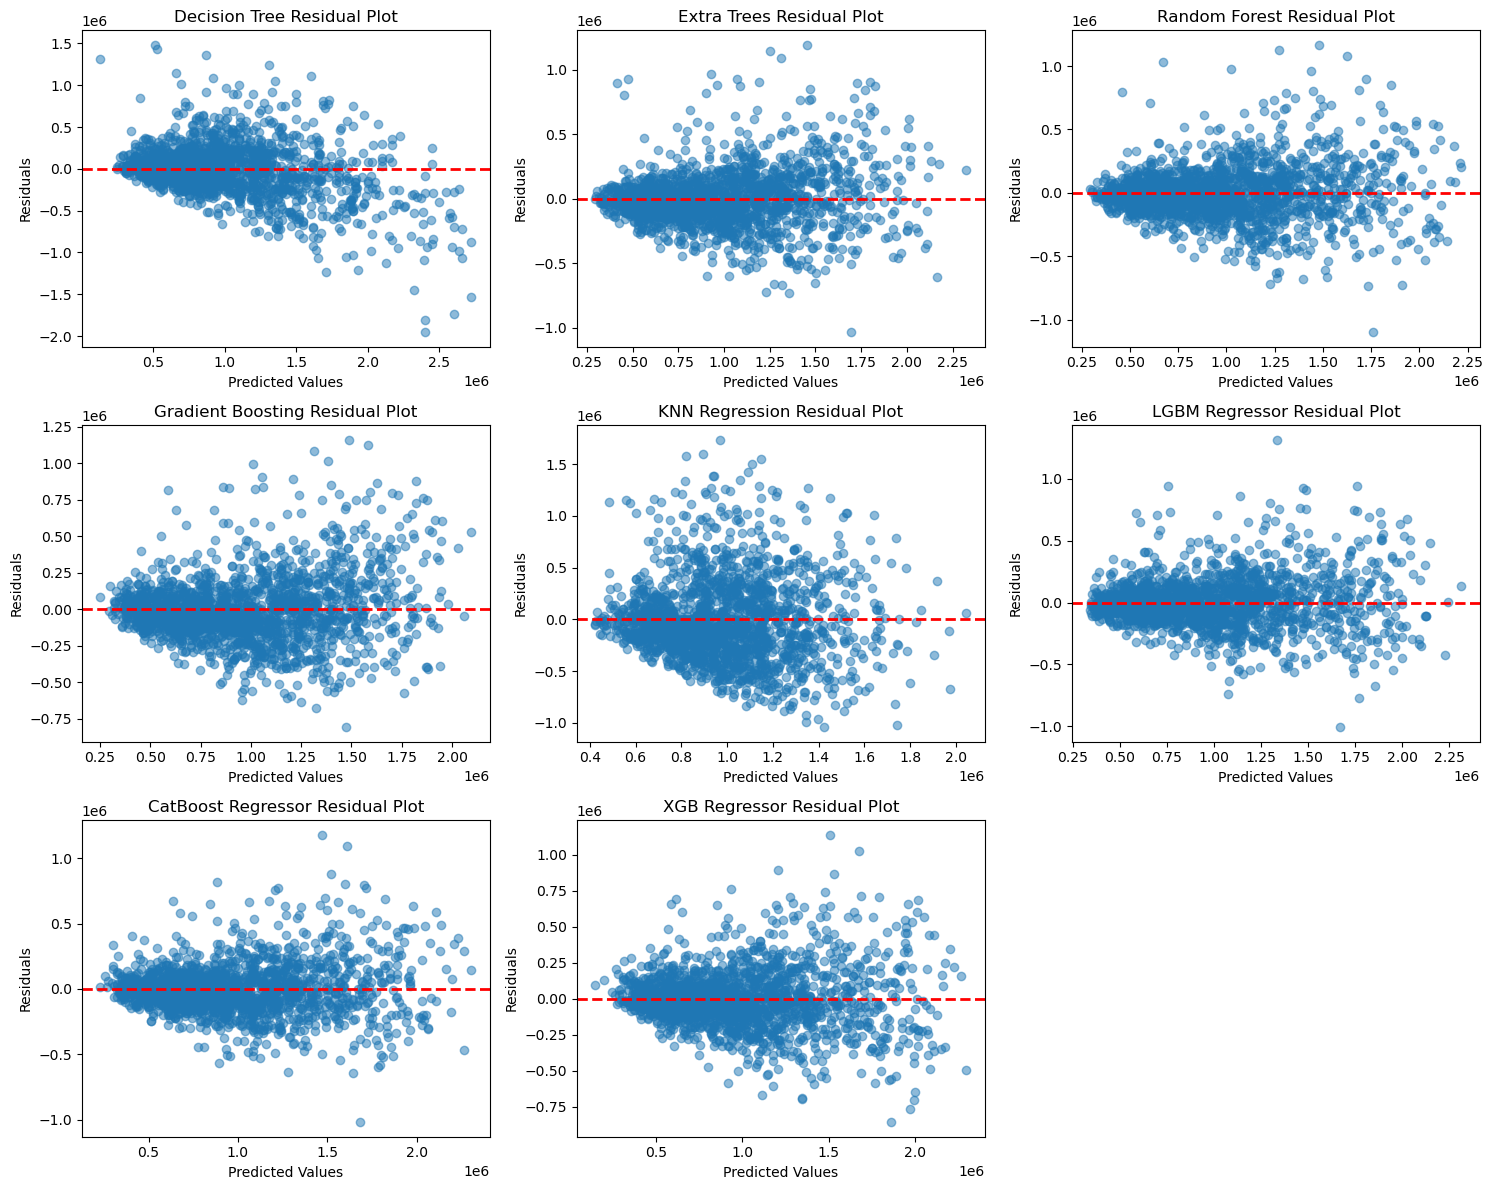

In [132]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

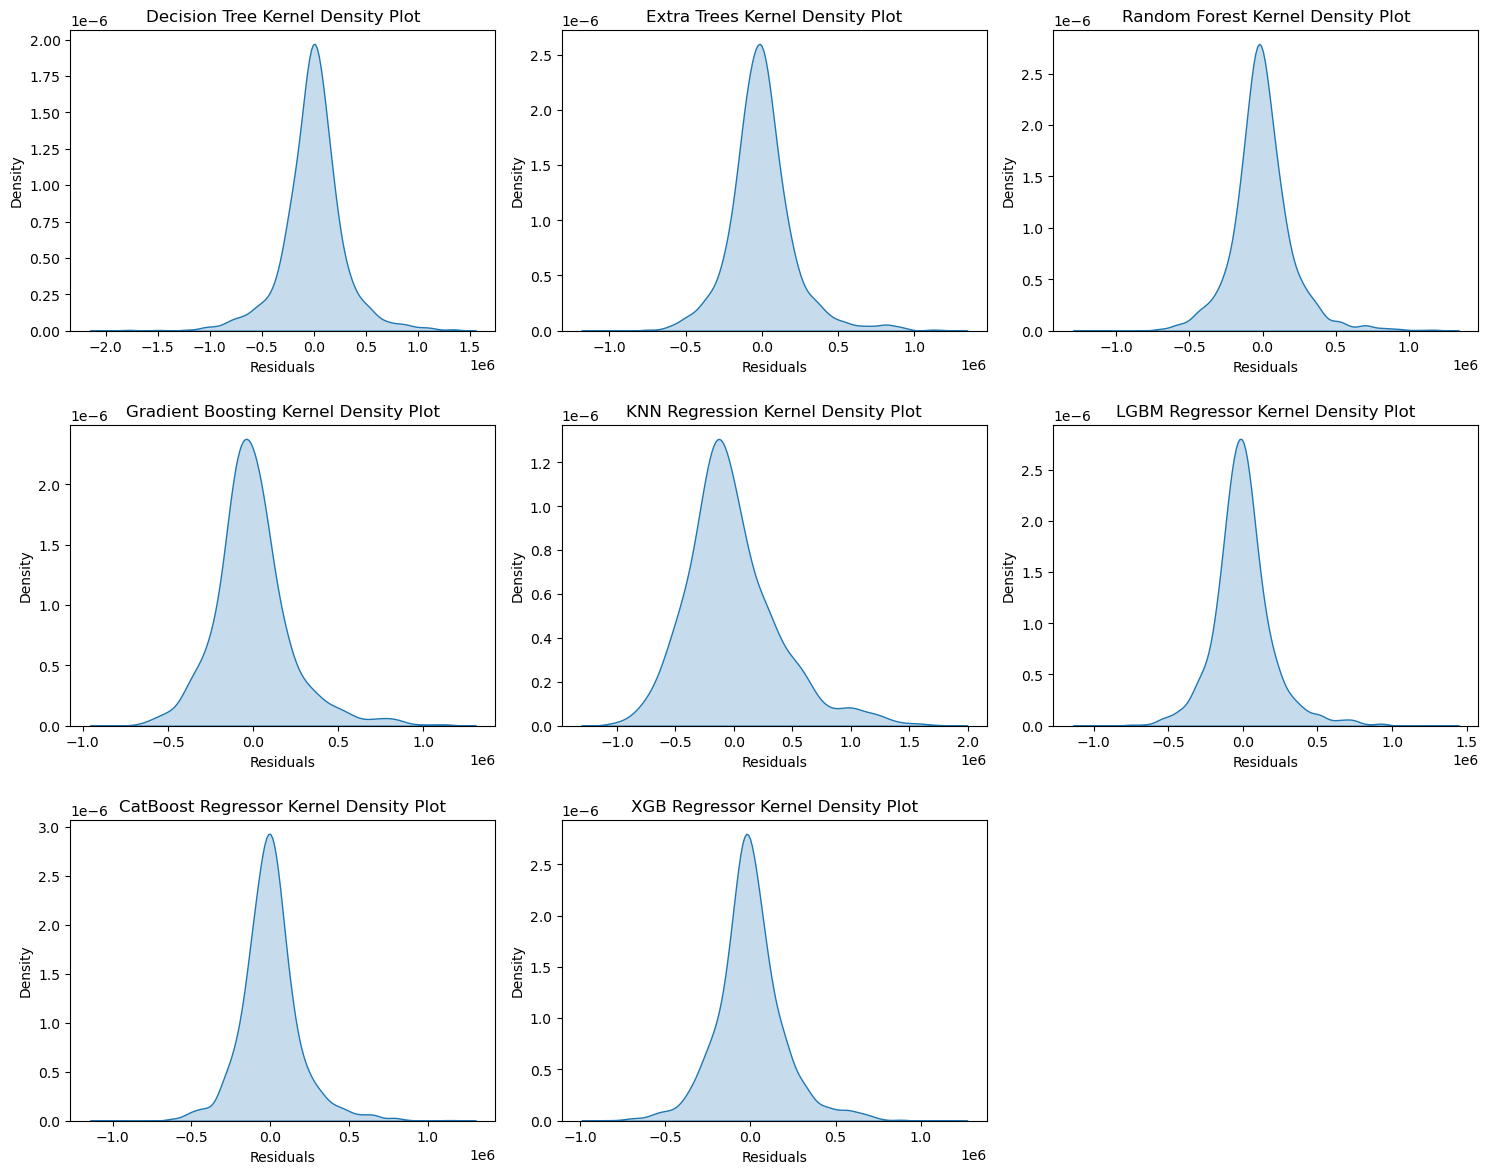

In [133]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

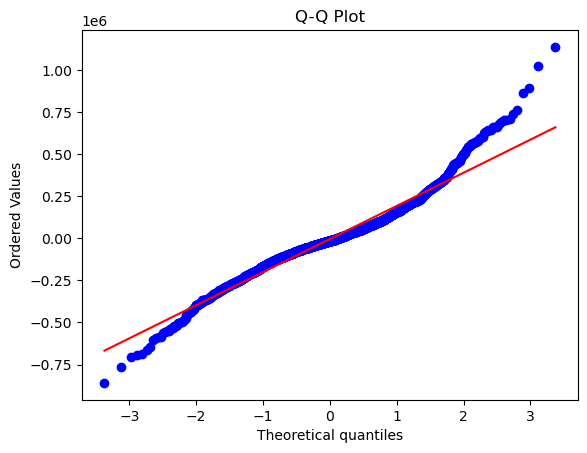

In [134]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


## Actual vs predicted 

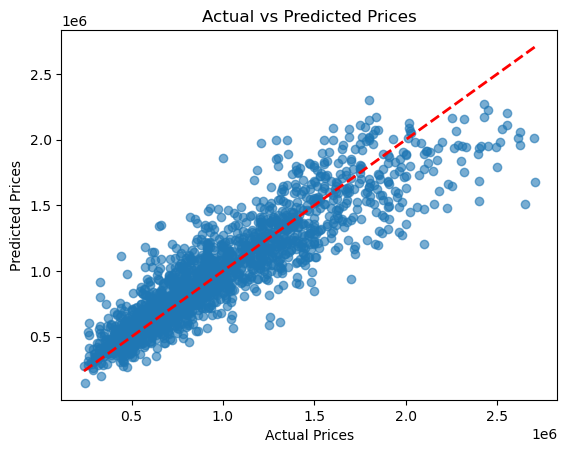

In [135]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

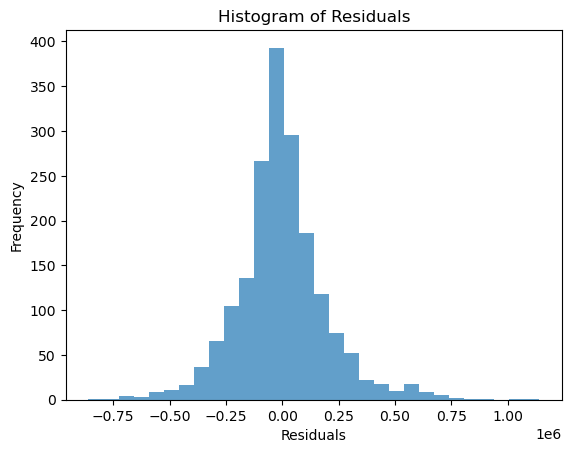

In [136]:
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


## Random Forest 

In [137]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Adjusted R2': [], 'COD': [], 'Training Time (s)': [], 'Prediction Time (s)': []
}

# Measure the training time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Measure the prediction time
start_time = time.time()
y_pred = rf_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

# Calculate Coefficient of Determination (COD) (it's equivalent to R2 in sklearn)
cod = r2  # COD is the same as R2 in sklearn metrics.

# Calculate Adjusted R2
n = X_test_scaled.shape[0]  # Number of samples
p = X_test_scaled.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Store results in a dictionary
results['Model'].append('Random Forest')
results['MAE'].append(mae)
results['MSE'].append(mse)
results['RMSE'].append(rmse)
results['R2'].append(r2)
results['Adjusted R2'].append(adjusted_r2)
results['COD'].append(cod)
results['MAPE'].append(mape)
results['Training Time (s)'].append(training_time)
results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df


Model            MAE           MSE           RMSE       MAPE  \
0  Random Forest  142429.741415  4.266730e+10  206560.655527  15.723038   

        R2  Adjusted R2      COD  Training Time (s)  Prediction Time (s)  
0  0.79954     0.793318  0.79954           8.151155             0.062466

## Scatter plot of actual vs predicted 

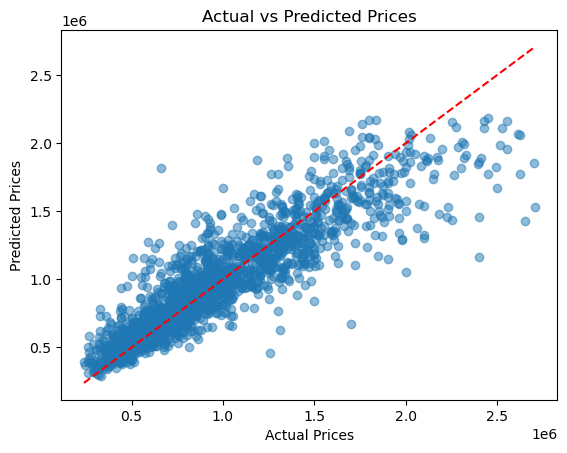

In [138]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

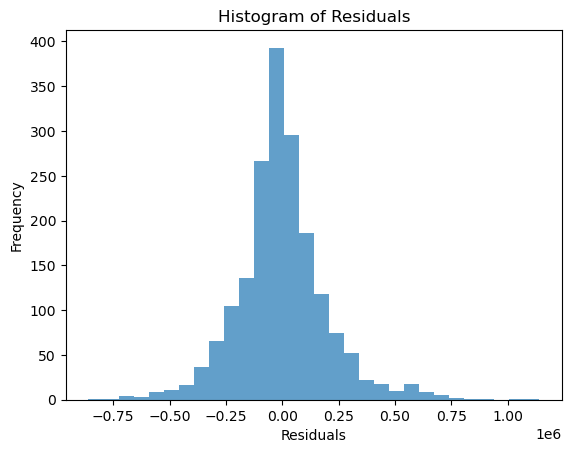

In [139]:
plt.hist(residuals, bins=30, alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


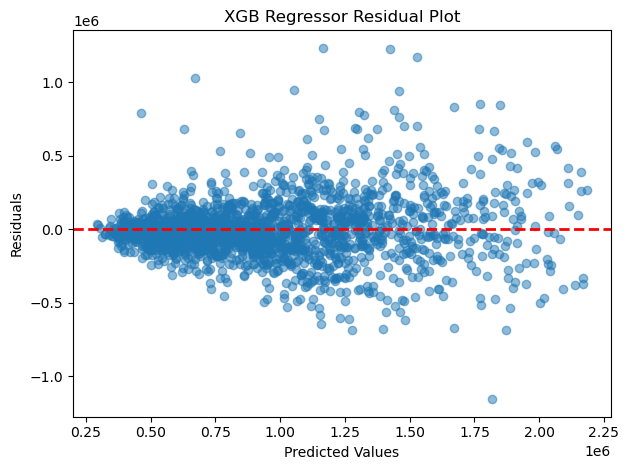

In [140]:
# Make predictions on the testing data
#y_pred = model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Residual plot for each model
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title(f'{model_name} Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

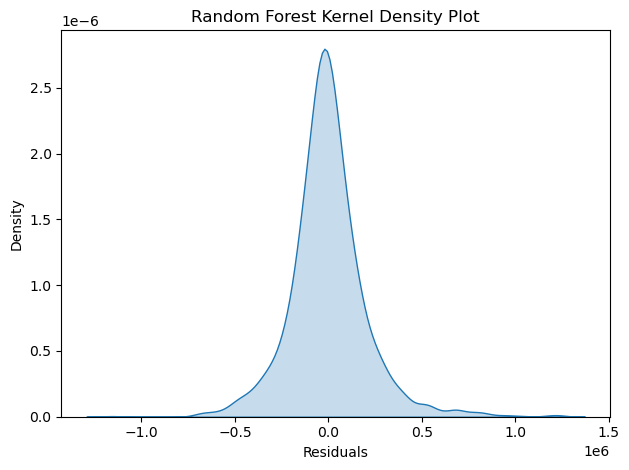

In [141]:
## KDE plot 
# Kernel density plot for residuals of each model
sns.kdeplot(residuals, fill=True)
plt.title('Random Forest Kernel Density Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

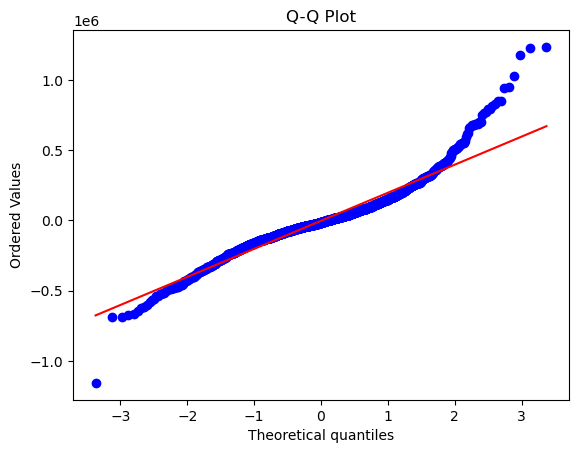

In [142]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


In [143]:
## Feature importance 

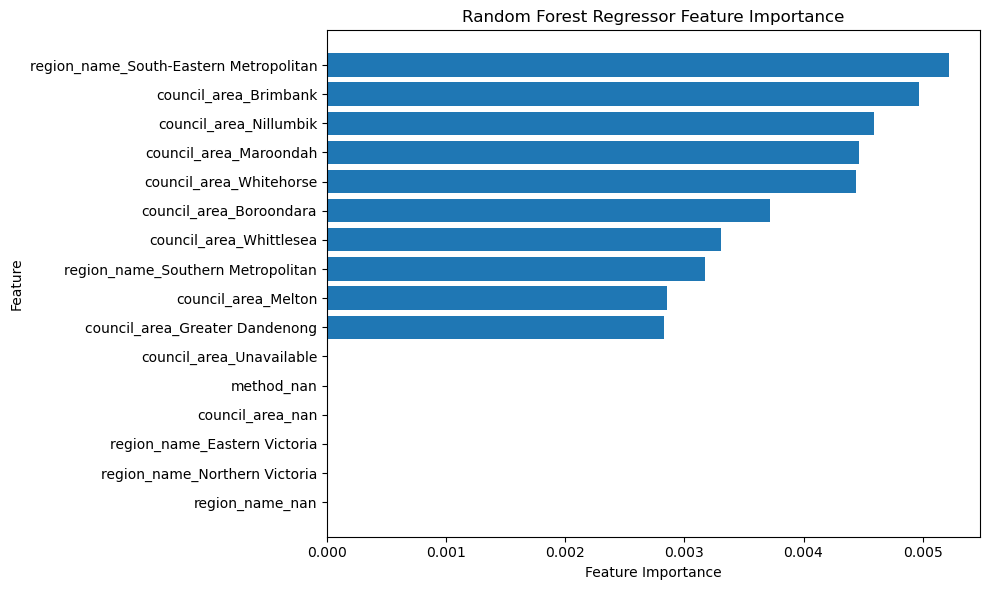

In [144]:
# Get Feature Importance
feature_importance =  model.feature_importances_

# Create a DataFrame to view feature importance 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[40:60]

# Plot Horizontal Bar Graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Regressor Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to have most important at the top
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

### The Residuals vs. Predicted Values 
- Is a diagnostic plot used to assess the assumption of homoscedasticity (constant variance) of residuals. Homoscedasticity is important where the assumption is that the variance of the errors (residuals) is constant across all levels of the independent variables.
1. Homoscedasticity (Ideal Case)
- The residuals should be randomly spread around zero without any clear patterns. This indicates that the variance of errors is constant across all predicted values. A good model should have residuals scattered evenly without a funnel-shaped pattern or any systematic trend.

2. Heteroscedasticity (Problematic Case)
- If the residuals form a pattern, such as a "funnel" shape (widening or narrowing as predicted values increase or decrease), it suggests that the variance of the residuals is not constant. This violates the assumption of homoscedasticity and can indicate model misspecification, outliers, or that the model is not capturing some underlying structure in the data.



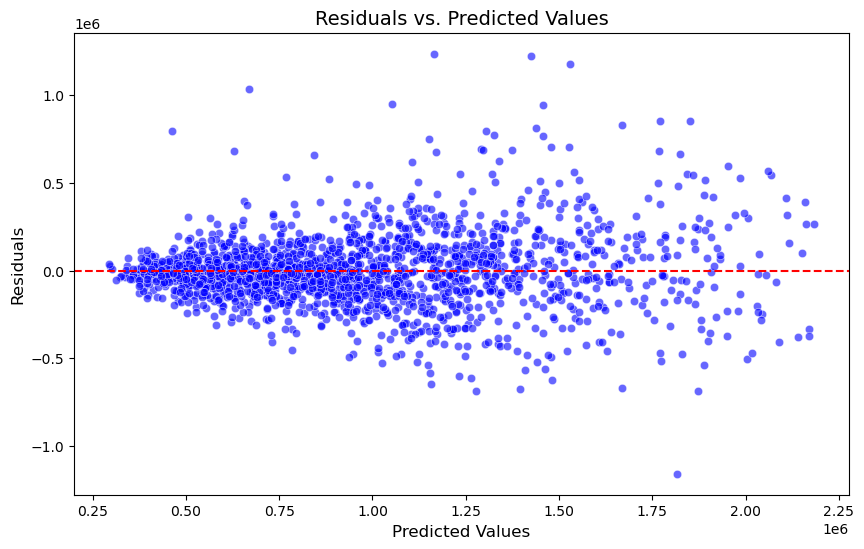

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='blue', alpha=0.6)

# Add horizontal line at 0 (indicating perfect predictions)
plt.axhline(y=0, color='red', linestyle='--')

# Set labels and title
plt.title('Residuals vs. Predicted Values', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)

# Show plot
plt.show()
